# Mission Analytics Data Exercise
## `deloitte` package API()walk through:

Please make sure to have installed the `deloitte` python package by using the following CMD in this root directory:
    
    `pip install -e .` 

In [1]:
import pandas as pd
from deloitte import Deloitte

In [2]:
data = Deloitte()
data.file_path = "MA_Exer_PikesPeak_Females.txt"
data.clean_data()
data.f_df.head()

,place,div_total,num,name,age,hometown,gun_time,net_time,pace,city,state,diff_time,division_new,gender
0,1,1/86,30,florence jepkosgei,22.0,"kenya,",1979.0,1978.0,319.0,kenya,NaN,1.0,2.0,females
1,2,2/86,8,eunice chepkirui,21.0,"kenya,",1994.0,1993.0,321.0,kenya,NaN,1.0,2.0,females
2,3,1/247,3200,elena orlova,36.0,"gaithersburg, md",2066.0,2065.0,333.0,gaithersburg,maryland,1.0,3.0,females
3,4,1/173,2,susannah kvasnicka,34.0,"great falls, va",2083.0,2082.0,335.0,great falls,virginia,1.0,3.0,females
4,5,1/142,6,casey smith,26.0,"arlington, va",2104.0,2102.0,339.0,arlington,virginia,2.0,2.0,females


In [3]:
data.file_path = "MA_Exer_PikesPeak_Males.txt"
data.clean_data()
data.m_df.head()

,place,div_total,num,name,age,hometown,gun_time,net_time,pace,city,state,diff_time,division_new,gender
0,1,1/48,9,joshua kemei,22.0,"kenya,",1728.0,1727.0,278.0,kenya,NaN,1.0,2.0,males
1,2,2/48,35,george kirwa misoi,22.0,"kenya,",1751.0,1750.0,282.0,kenya,NaN,1.0,2.0,males
2,3,3/48,3,jacob frey,24.0,"oakton, va",1778.0,1777.0,286.0,oakton,virginia,1.0,2.0,males
3,4,1/96,49,gurmessa kumsa,27.0,"oxon hill, md",1786.0,1786.0,288.0,oxon hill,maryland,0.0,2.0,males
4,5,4/48,31,mike baird,24.0,"ardmore, pa",1831.0,1830.0,295.0,ardmore,pennsylvania,1.0,2.0,males


In [4]:
data.combine()
data.all_df.head()

,place,div_total,num,name,age,hometown,gun_time,net_time,pace,city,state,diff_time,division_new,gender
0,1,1/86,30,florence jepkosgei,22.0,"kenya,",1979.0,1978.0,319.0,kenya,NaN,1.0,2.0,females
1,2,2/86,8,eunice chepkirui,21.0,"kenya,",1994.0,1993.0,321.0,kenya,NaN,1.0,2.0,females
2,3,1/247,3200,elena orlova,36.0,"gaithersburg, md",2066.0,2065.0,333.0,gaithersburg,maryland,1.0,3.0,females
3,4,1/173,2,susannah kvasnicka,34.0,"great falls, va",2083.0,2082.0,335.0,great falls,virginia,1.0,3.0,females
4,5,1/142,6,casey smith,26.0,"arlington, va",2104.0,2102.0,339.0,arlington,virginia,2.0,2.0,females


# Q1 What are the mean, median mode, and range of the race results for all racers by gender?

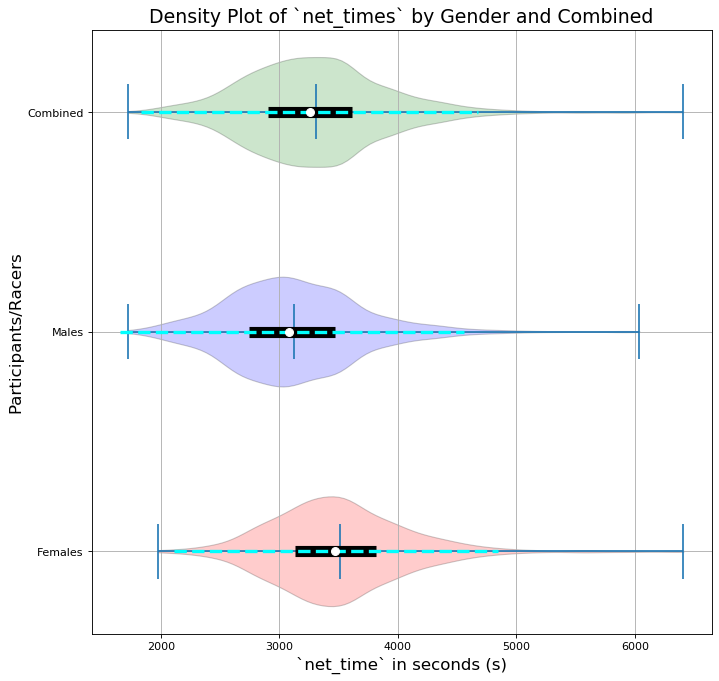

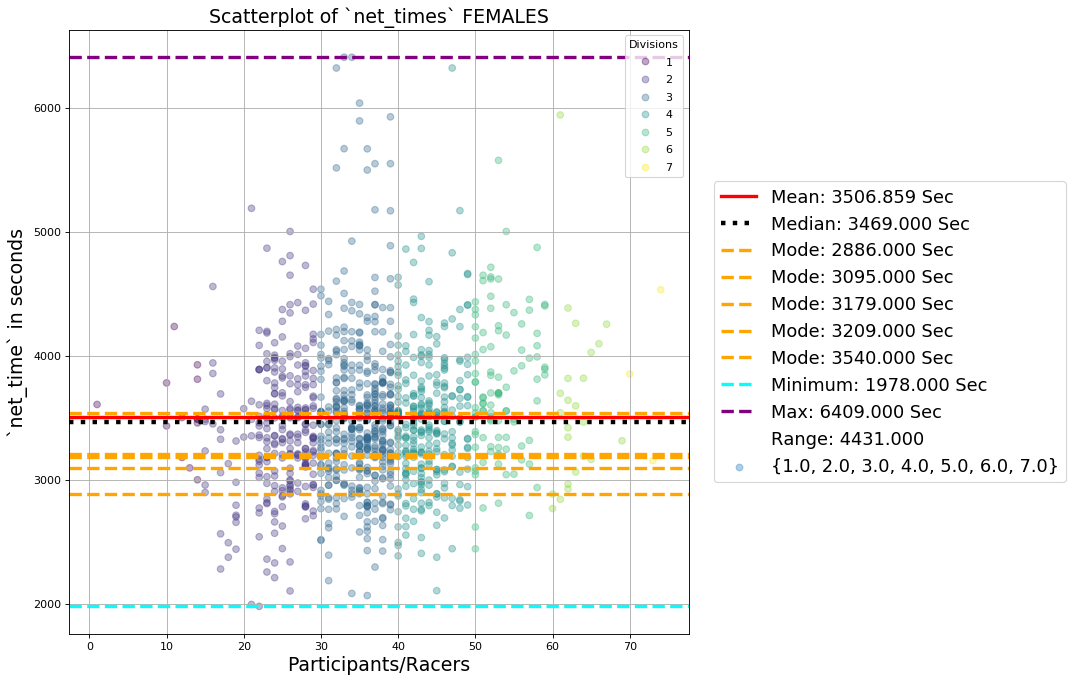

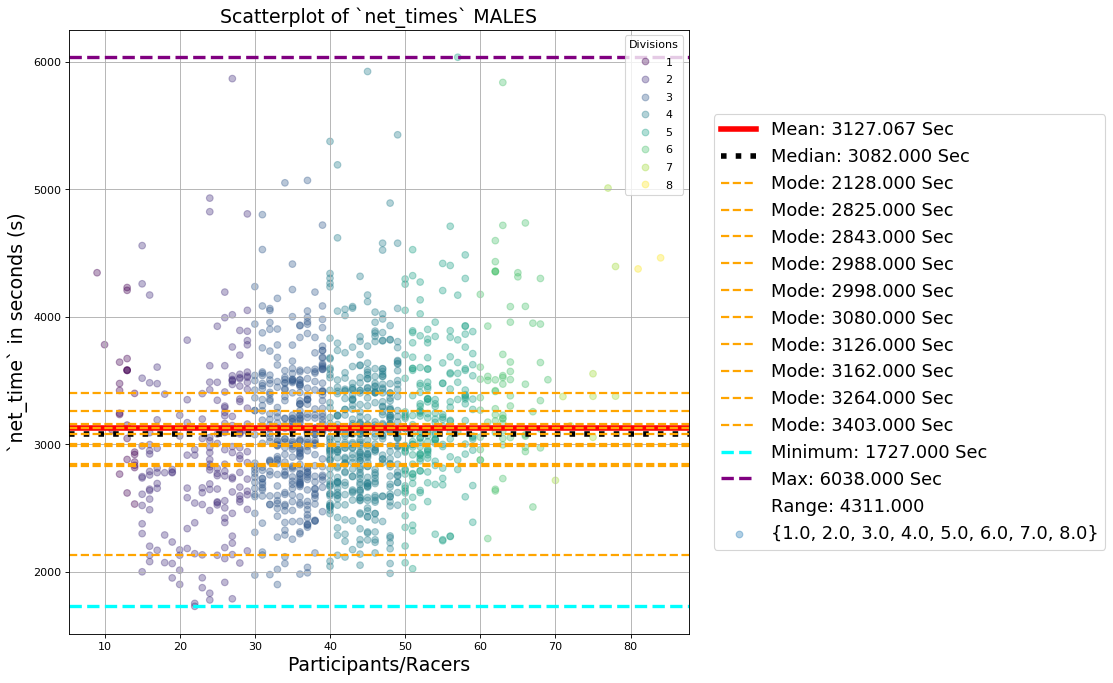

In [5]:
data.vis_q1()

# Q2 Analyze the difference between gun and net time race results.

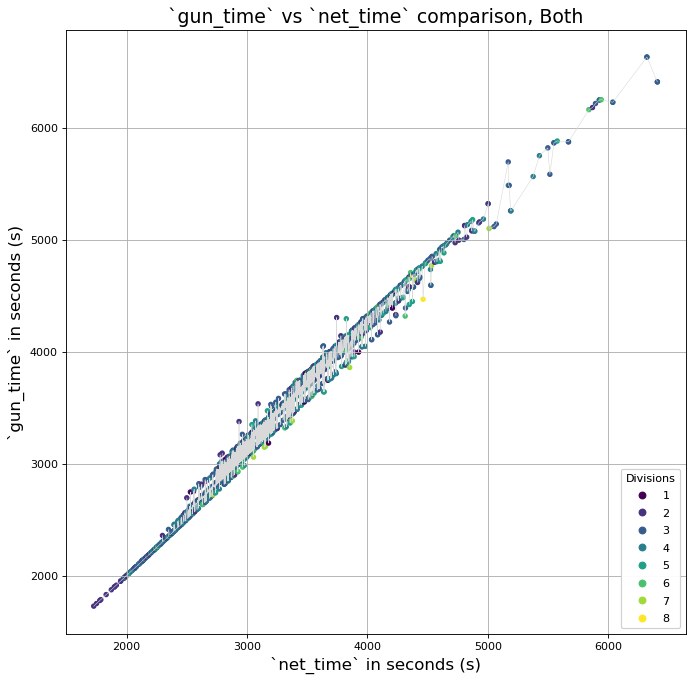

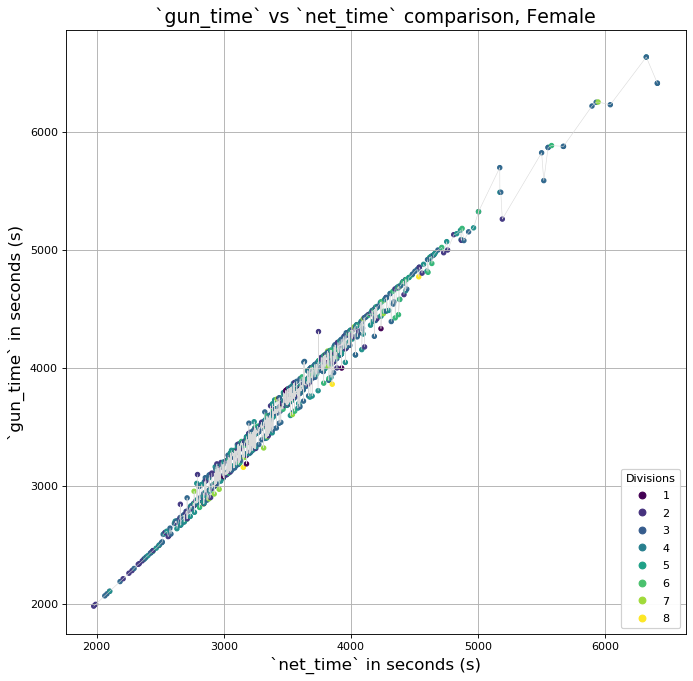

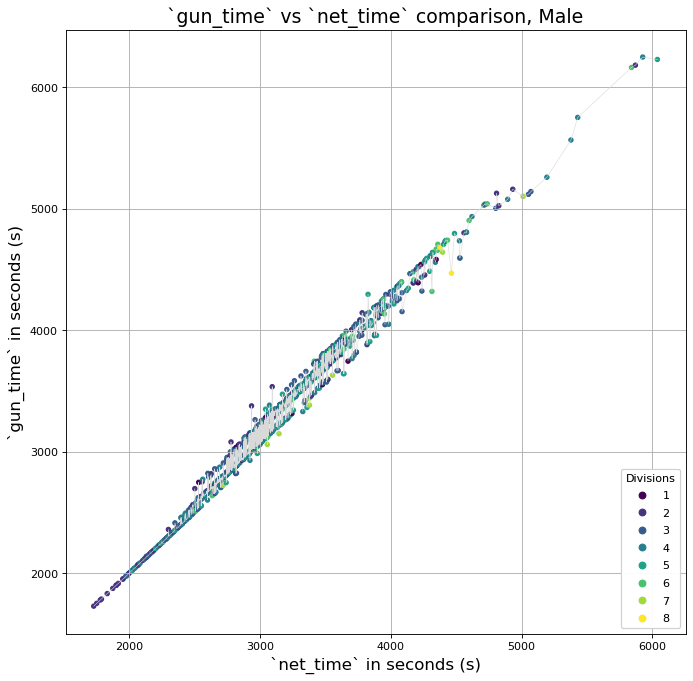

In [6]:
data.vis_q2()

# Q3 How much time separates Chris Doe from the top 10 percentile of racers of the same division

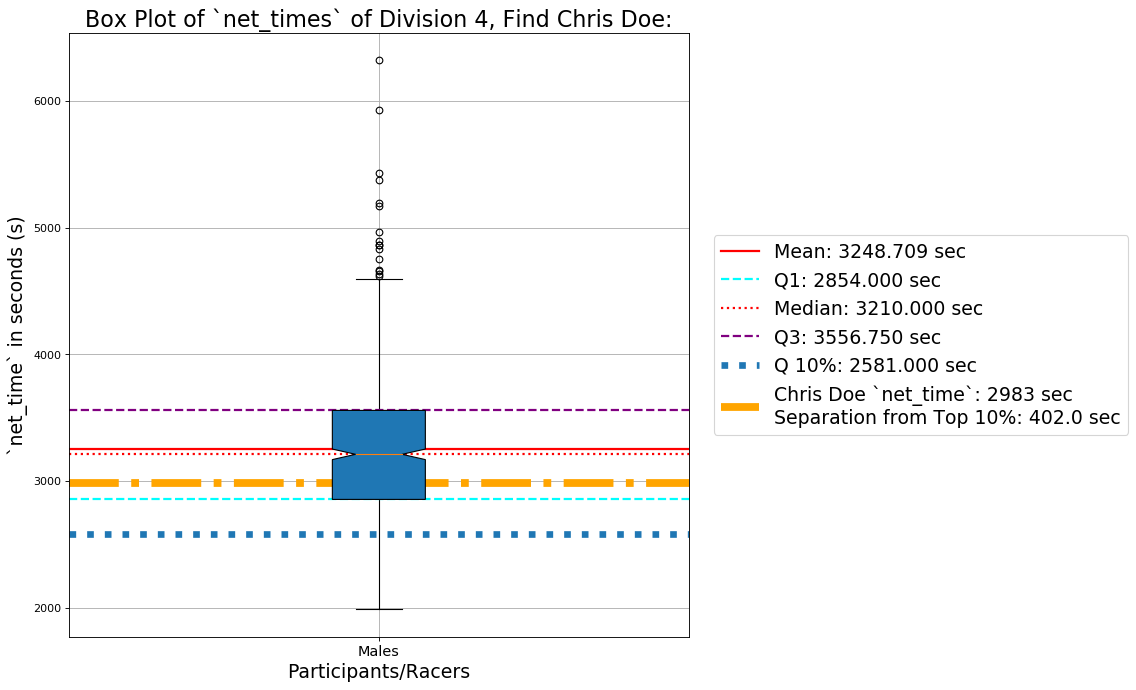

In [7]:
data.vis_q3()

# Q4 Compare the race results of each division.

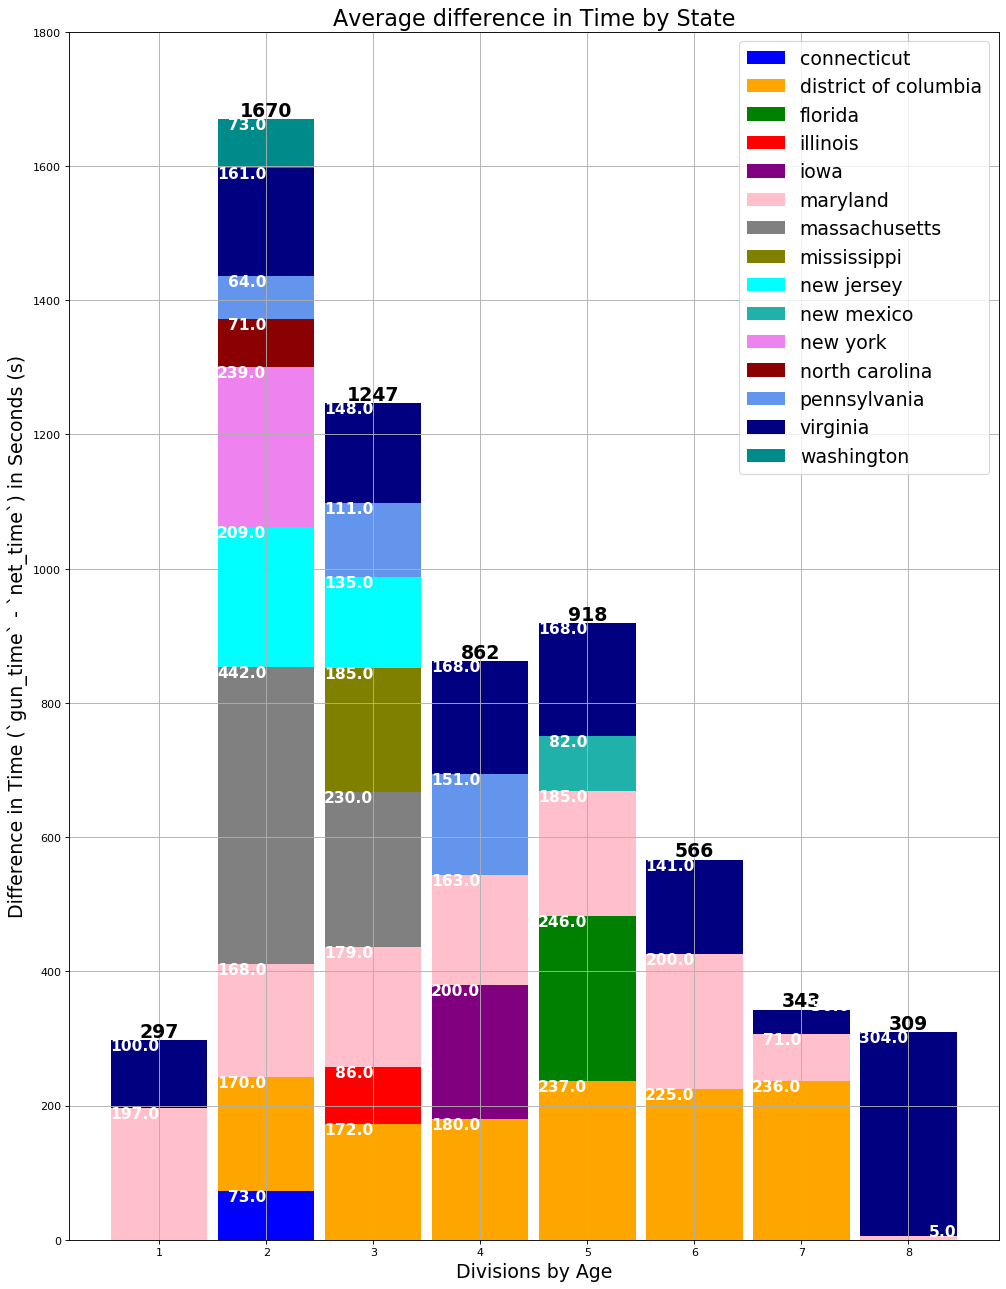

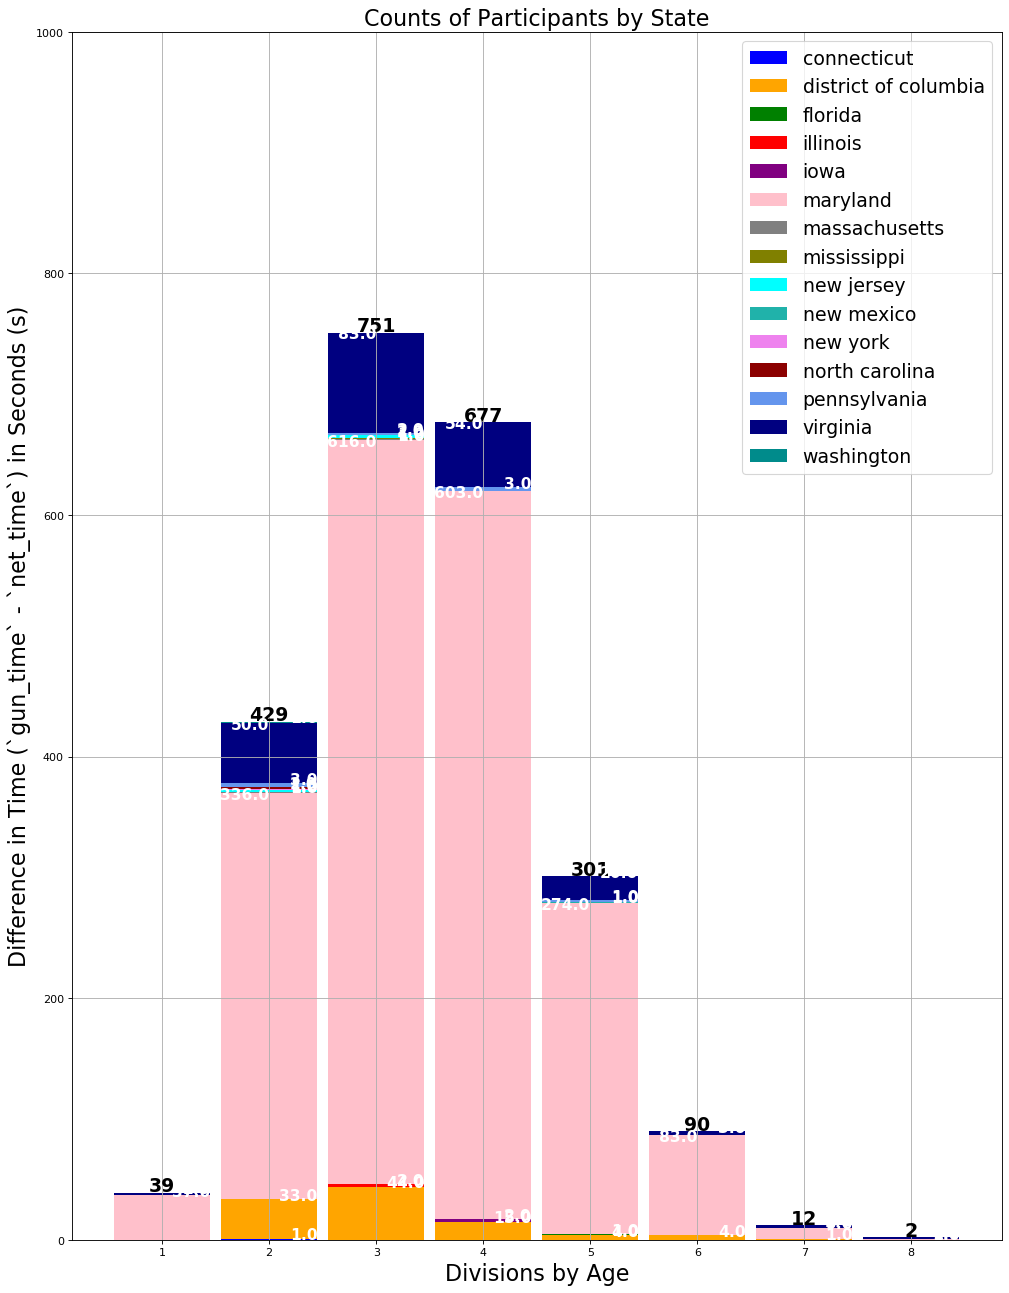

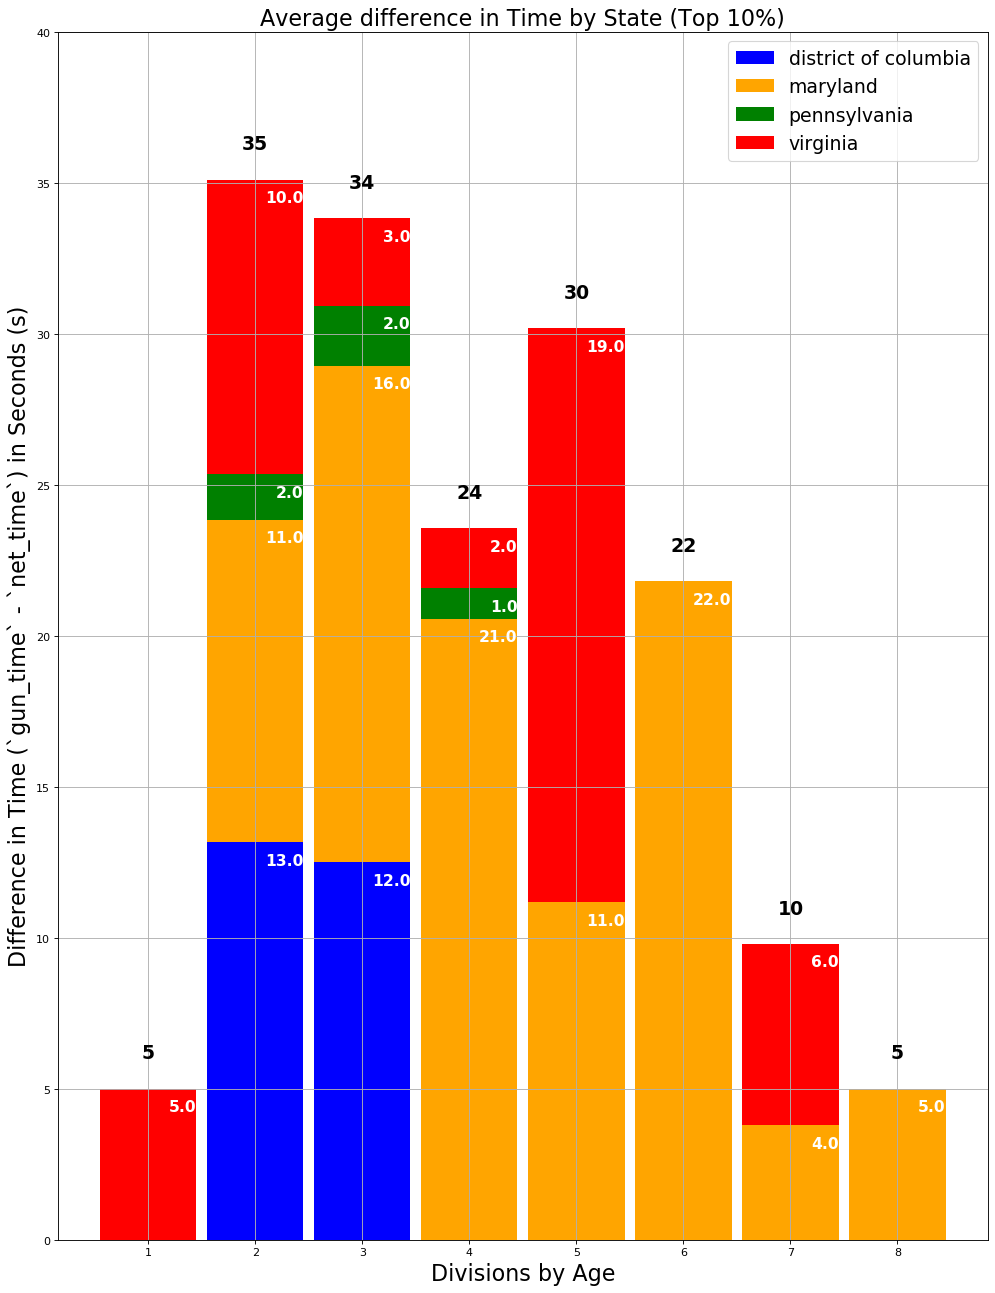

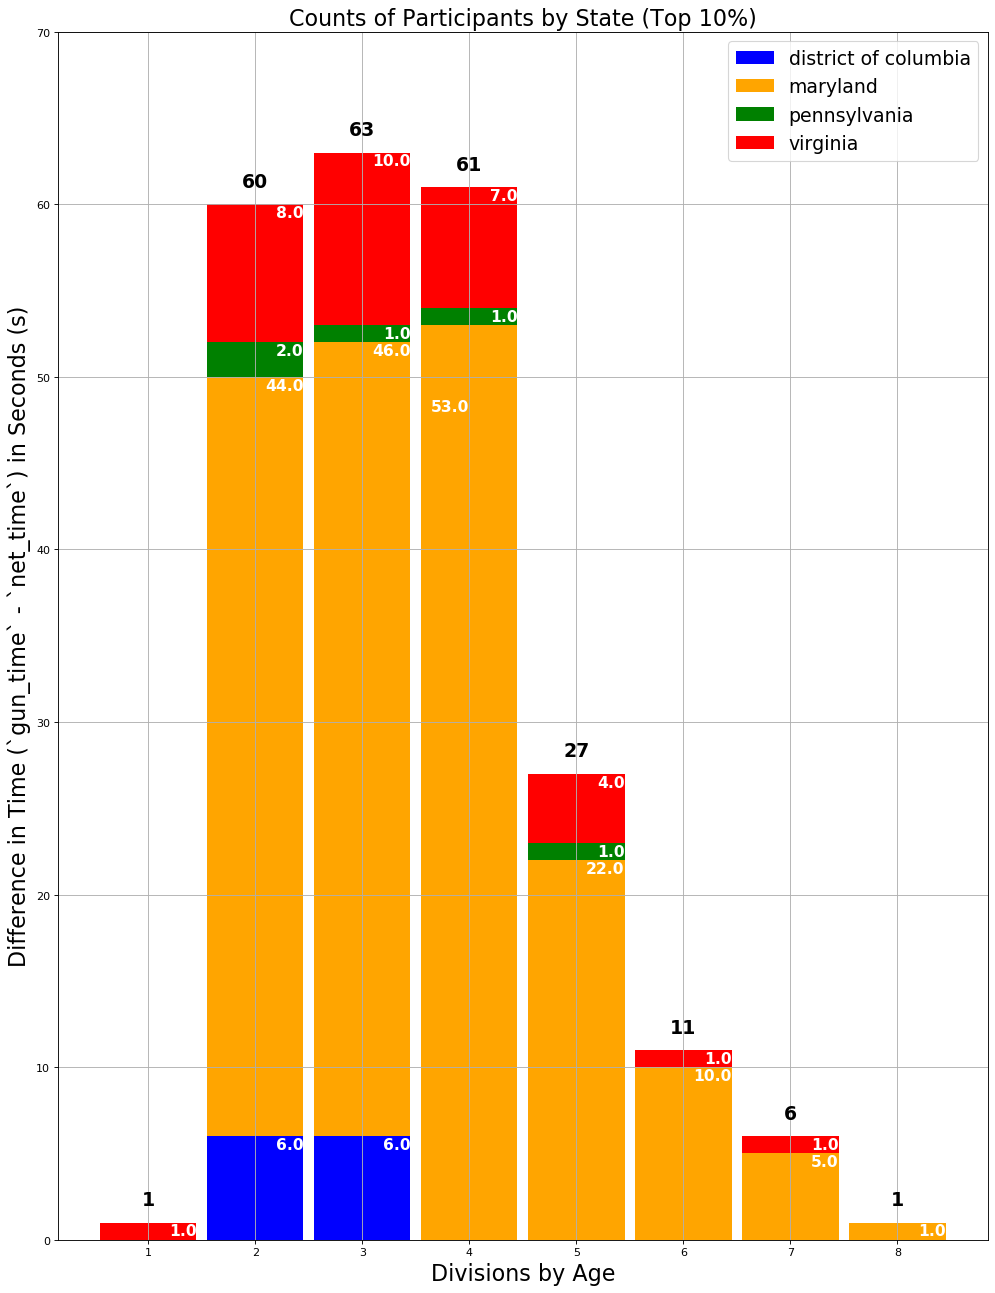

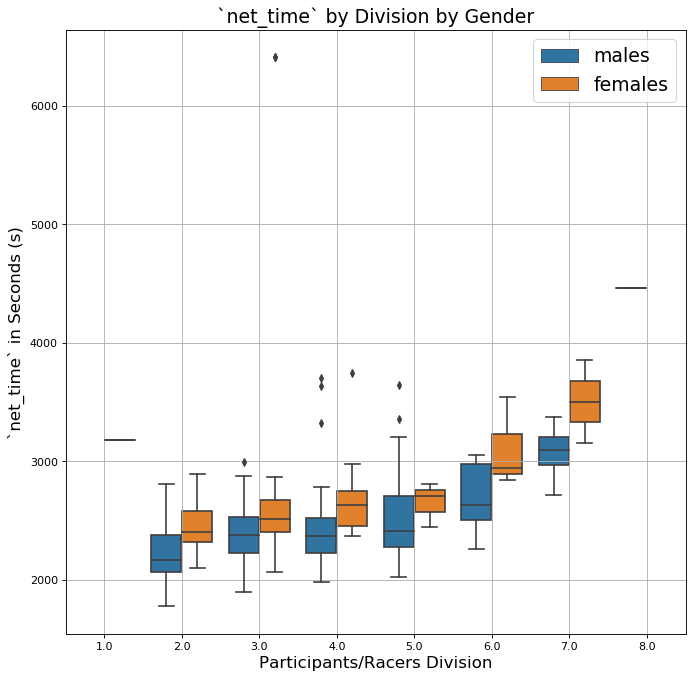

In [8]:
data.vis_q4()

# Code Exploration for `deloitte` helper package development:

In [9]:
file_names = ["MA_Exer_PikesPeak_Females.txt", "MA_Exer_PikesPeak_Males.txt"]
test_df = pd.read_csv('data/raw/{}'.format(file_names[0]),
                     encoding='latin-1', sep='\t')

file_names[0].split('.')[0].split('_')[-1]

'Females'

In [10]:
# renaming column names
test_df.columns = map(str.lower, test_df.columns)
test_df.rename(columns={'div/tot':'div_total', 'ag':'age','gun tim':'gun_time', 'net tim':'net_time'}, inplace=True)
clean_cols = test_df.columns.tolist()
clean_cols.pop(3) # removes `name` column
clean_cols.pop(4) # removes `hometown` column

print(clean_cols)
# cleaning special symbols from columns to normalize data
for col in clean_cols:
    test_df[col].replace(to_replace='[#*^a-zA-Z ]',value='', regex=True, inplace=True)
test_df['hometown'].replace(to_replace='[,.]', value='', regex=True, inplace=True)

test_df['gun_time']


['place', 'div_total', 'num', 'age', 'gun_time', 'net_time', 'pace']


0         32:59
1         33:14
2         34:26
3         34:43
4         35:04
         ...   
1100    1:43:47
1101    1:50:31
1102    1:50:31
1103    1:46:49
1104    1:46:49
Name: gun_time, Length: 1105, dtype: object

In [11]:
from datetime import datetime

def try_parsing_date(text):
    for fmt in ('%H:%M:%S', '%M:%S', ':%S'):
        try:
            return datetime.strptime(text, fmt)
        except ValueError:
            pass
    raise ValueError('no valid date format found')

                
test_df['gun_time'] = test_df['gun_time'].map(try_parsing_date)
test_df['gun_time'] = test_df['gun_time'] - datetime(1900, 1, 1) # Remove date part
test_df['gun_time'].dt.total_seconds()

test_df['net_time'] = test_df['net_time'].map(try_parsing_date)
test_df['net_time'] = test_df['net_time'] - datetime(1900, 1, 1) # Remove date part
test_df['net_time'].dt.total_seconds()

test_df['pace'] = test_df['pace'].map(try_parsing_date)
test_df['pace'] = test_df['pace'] - datetime(1900, 1, 1) # Remove date part
test_df['pace'].dt.total_seconds()

#pd.to_datetime(test_df.gun_time, format='%H:%M:%S.%f')


0        319.0
1        321.0
2        333.0
3        335.0
4        339.0
         ...  
1100     972.0
1101    1018.0
1102    1018.0
1103    1032.0
1104    1032.0
Name: pace, Length: 1105, dtype: float64

In [12]:
def rreplace(s, old=' ', new=', ', occurrence=1):
    li = s.rsplit(old, occurrence)
    return new.join(li)

test_df['hometown']=test_df['hometown'].map(rreplace)

test_df[['city','state']]=test_df.hometown.str.split(',', expand=True)
test_df['state'].replace(to_replace=' ', value='', regex=True, inplace=True)

In [13]:
#test_df.loc[3,'state']

In [14]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
    
# invert the dictionary
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))
print(abbrev_to_us_state)
test_df['state']=test_df['state'].map(abbrev_to_us_state)

{'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming', 'DC': 'District of Columbia', 'AS': 'American Samoa', 'GU': 'Guam', 'MP': 'No

In [15]:
set(test_df.loc[test_df['state'].isnull(),:]['city'])

# Filling in due to Experience 
missing_states={'Ellicott City':'Maryland', 'Fredericksburg':'Virginia', 
                'North Potomac':'Maryland', 'Silver Spring':'Maryland',
               'Washington':'District of Columbia'}
print(missing_states.keys())
subset = test_df.loc[test_df['city'].isin(missing_states.keys()),'city']
test_df.loc[subset.index,'state'] =\
      test_df.loc[subset.index,'city'].map(missing_states)


test_df.loc[test_df['state'].isnull(), :].shape

dict_keys(['Ellicott City', 'Fredericksburg', 'North Potomac', 'Silver Spring', 'Washington'])


(26, 11)

In [16]:
test_df.loc[test_df['age'].isna(), :]
test_df.loc[test_df['age']==0, :]
test_df.loc[test_df['age']<0, :]

,place,div_total,num,name,age,hometown,gun_time,net_time,pace,city,state
382,383,4/15,1917,Stefanie Merritt,-1.0,"Alexandria, VA",00:55:33,00:54:22,00:08:45,Alexandria,Virginia
1008,1009,15/15,1778,Susan Mackey,-1.0,"North Potomac, M",01:16:36,01:11:18,00:11:29,North Potomac,Maryland


In [17]:
import numpy as np
def division_parser(x):
    if (pd.isnull(x) or x<0):
        return np.nan
    elif (x>0) and (x<=14):
        return 1
    elif (x>=15) and (x<=19):
        return 2
    else:
        return int(x/10)
    
    
test_df['division_new'] = test_df['age'].map(division_parser)

In [18]:
test_df.loc[~test_df['division_new'].isnull(), :]

,place,div_total,num,name,age,hometown,gun_time,net_time,pace,city,state,division_new
0,1,1/86,30,Florence Jepkosgei,22.0,"Kenya,",00:32:59,00:32:58,00:05:19,Kenya,NaN,2.0
1,2,2/86,8,Eunice Chepkirui,21.0,"Kenya,",00:33:14,00:33:13,00:05:21,Kenya,NaN,2.0
2,3,1/247,3200,Elena Orlova,36.0,"Gaithersburg, MD",00:34:26,00:34:25,00:05:33,Gaithersburg,Maryland,3.0
3,4,1/173,2,Susannah Kvasnicka,34.0,"Great Falls, VA",00:34:43,00:34:42,00:05:35,Great Falls,Virginia,3.0
4,5,1/142,6,Casey Smith,26.0,"Arlington, VA",00:35:04,00:35:02,00:05:39,Arlington,Virginia,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1100,1101,247/247,1847,Alicia Maxwell,35.0,"Germantown, MD",01:43:47,01:40:39,00:16:12,Germantown,Maryland,3.0
1101,1102,110/110,2618,Regina Tenali,47.0,"Gaithersburg, MD",01:50:31,01:45:22,00:16:58,Gaithersburg,Maryland,4.0
1102,1103,171/173,986,Nirmala Donley,32.0,"Ellicott City, M",01:50:31,01:45:22,00:16:58,Ellicott City,Maryland,3.0
1103,1104,172/173,1214,Heidi Gertner,34.0,"Bethesda, MD",01:46:49,01:46:49,00:17:12,Bethesda,Maryland,3.0


# Q1 What are the mean, median mode, and range of the race results for all racers by gender?

In [19]:
data.f_df.head()

,place,div_total,num,name,age,hometown,gun_time,net_time,pace,city,state,diff_time,division_new,gender
0,1,1/86,30,florence jepkosgei,22.0,"kenya,",1979.0,1978.0,319.0,kenya,NaN,1.0,2.0,females
1,2,2/86,8,eunice chepkirui,21.0,"kenya,",1994.0,1993.0,321.0,kenya,NaN,1.0,2.0,females
2,3,1/247,3200,elena orlova,36.0,"gaithersburg, md",2066.0,2065.0,333.0,gaithersburg,maryland,1.0,3.0,females
3,4,1/173,2,susannah kvasnicka,34.0,"great falls, va",2083.0,2082.0,335.0,great falls,virginia,1.0,3.0,females
4,5,1/142,6,casey smith,26.0,"arlington, va",2104.0,2102.0,339.0,arlington,virginia,2.0,2.0,females


In [20]:
cols_of_int = ['gun_time','net_time','pace']
data.f_df[cols_of_int].describe().loc[['mean','min','50%','max'], :]

,gun_time,net_time,pace
mean,3703.549321,3508.484163,565.040724
min,1979.000000,1978.000000,319.000000
50%,3685.000000,3471.000000,559.000000
max,6631.000000,6409.000000,1032.000000


In [21]:
data.m_df['net_time'].mode()

0    2128.0
1    2825.0
2    2843.0
3    2988.0
4    2998.0
5    3080.0
6    3126.0
7    3162.0
8    3264.0
9    3403.0
dtype: float64

In [22]:
data.f_df[cols_of_int].mode()

,gun_time,net_time,pace
0,3707.0,2886.0,538.0
1,3760.0,3095.0,NaN
2,NaN,3179.0,NaN
3,NaN,3209.0,NaN
4,NaN,3540.0,NaN


In [23]:
data.m_df.head()
data.m_df[cols_of_int].describe().loc[['mean','min','50%','max'], :]

,gun_time,net_time,pace
mean,3278.180237,3127.950988,503.789723
min,1728.000000,1727.000000,278.000000
50%,3258.000000,3083.000000,497.000000
max,6247.000000,6038.000000,972.000000


In [24]:
data.f_df[cols_of_int].mode()

,gun_time,net_time,pace
0,3707.0,2886.0,538.0
1,3760.0,3095.0,NaN
2,NaN,3179.0,NaN
3,NaN,3209.0,NaN
4,NaN,3540.0,NaN


In [25]:
from collections import Counter
def my_mode(sample):
    c = Counter(sample)
    return [k for k, v in c.items () if v ==c.most_common(1)[0][1]]

my_mode(data.f_df['net_time'])

[2886.0, 3095.0, 3179.0, 3209.0, 3540.0]

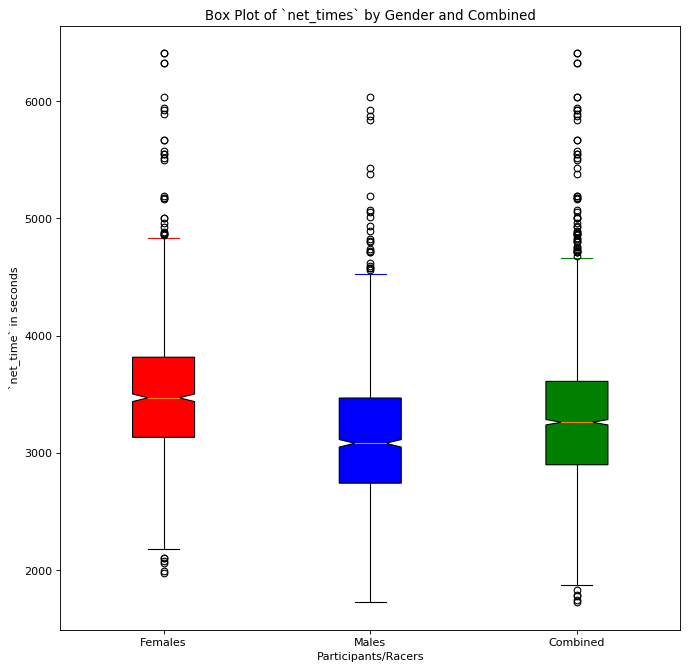

In [26]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(10,10), dpi=80)
net_array = np.array([data.f_df['net_time'],\
                      data.m_df['net_time'],\
                      data.all_df['net_time']])
colors = ['red','blue','green']
bp = plt.boxplot(net_array,
              patch_artist=True,
              notch=True)

for i in range(len(bp['boxes'])):
    bp['boxes'][i].set(facecolor=colors[i])
    bp['caps'][2*i+1].set(color=colors[i])
    
plt.xticks([1,2,3],['Females','Males','Combined'])
plt.title('Box Plot of `net_times` by Gender and Combined')  
plt.ylabel('`net_time` in seconds')
plt.xlabel('Participants/Racers')
plt.show()

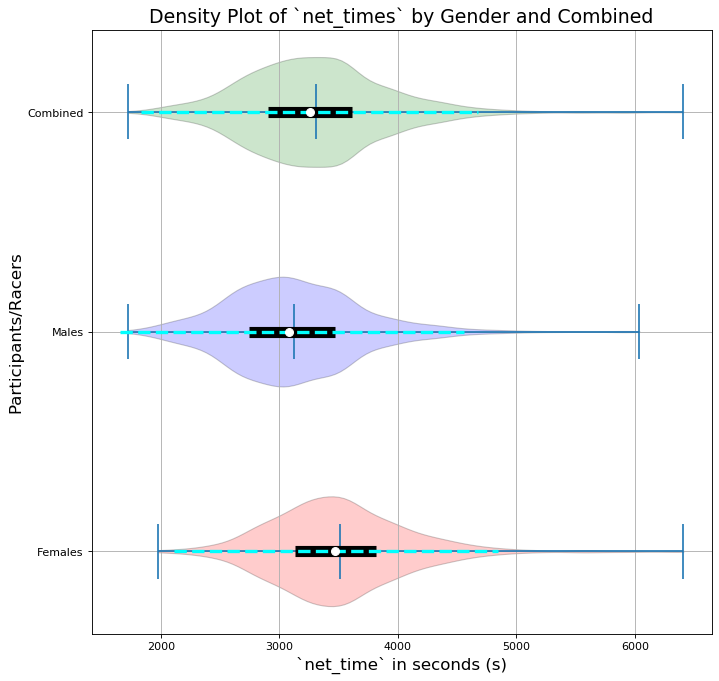

In [27]:
figure(figsize=(10,10), dpi=80)
def adjacent_values(vals, q1, q3):
    upper_adjacent_value= q3+ (q3-q1)*1.5
    upper_adjacent_value= np.clip(upper_adjacent_value, q3, vals[-1])
    
    lower_adjacent_value= q3- (q3-q1)*1.5
    lower_adjacent_value= np.clip(lower_adjacent_value, vals[0], q1) 
    
    return lower_adjacent_value, upper_adjacent_value

colors = ['red','blue','green']

vp = plt.violinplot(net_array, vert=False,
                   showextrema=True,
                   showmeans=True)

med1,med2,med3 = np.quantile(net_array[0],.50),\
                    np.quantile(net_array[1],.50),\
                    np.quantile(net_array[2],.50)

plt.scatter([med1,med2,med3], [1,2,3],\
                marker='o', color='white', s=50, zorder=3)

q11,q21,q31 = np.quantile(net_array[0],.25),\
                    np.quantile(net_array[1],.25),\
                    np.quantile(net_array[2],.25)
q13,q23,q33 = np.quantile(net_array[0],.75),\
                    np.quantile(net_array[1],.75),\
                    np.quantile(net_array[2],.75)

whiskers_min =\
    np.array([q11,q21,q31]) - (np.array([q13,q23,q33]) - np.array([q11,q21,q31])) * 1.5
whiskers_max =\
    np.array([q13,q23,q33]) + (np.array([q13,q23,q33]) - np.array([q11,q21,q31])) * 1.5

plt.hlines([1,2,3],[q11,q21,q31], [q13,q23,q33], color='k', linestyle='-', lw=10)
plt.hlines([1,2,3], whiskers_min, whiskers_max, color='aqua', linestyle='dashed', lw=3)

plt.yticks([1,2,3],['Females','Males','Combined'])

#plt.tick_param(axis='y', labelrotation=90)
for i in range(len(vp['bodies'])):
    vp['bodies'][i].set(facecolor=colors[i])
    vp['bodies'][i].set(edgecolor='black')
    vp['bodies'][i].set(alpha=0.2)
    
plt.title('Density Plot of `net_times` by Gender and Combined', size=17)
plt.grid()
plt.xlabel('`net_time` in seconds (s)', size=15)
plt.ylabel('Participants/Racers', size=15)
plt.show()

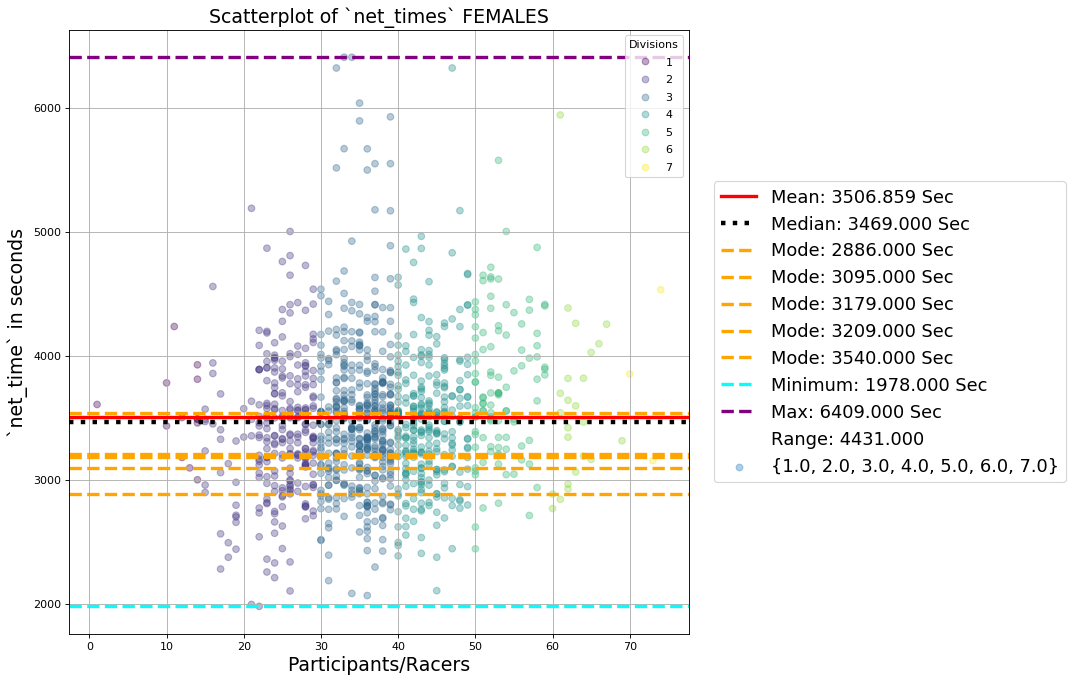

In [28]:
figure(figsize=(10,10), dpi=80)
subset = data.f_df[data.f_df.division_new.notnull()]
subset = subset[subset.division_new>0]
colors = subset['division_new']
scatter = plt.scatter(subset['age'], subset['net_time'],
            c=colors, alpha=0.35, label=set(colors))
mu,mi,med,mx =\
    subset['net_time'].describe().loc[['mean','min','50%','max']]

mod = subset['net_time'].mode()
meanli = plt.axhline(y=mu,color='red', linewidth=3, 
                    linestyle='-', label='Mean: {0:.3f} Sec'.format(mu))
medli = plt.axhline(y=med,color='k', linewidth=4, 
                    linestyle='dotted', label='Median: {0:.3f} Sec'.format(med))

#modeli = plt.axhline(y=mod,color='orange', linewidth=4, 
#                    linestyle='--', label='Mode: {0:.3f} Sec'.format(mod))
modli=[]
for i in range(len(mod)):
    modli.append(plt.axhline(y=mod[i],color='orange', linewidth=3, 
                    linestyle='--', label='Mode: {0:.3f} Sec'.format(mod[i])))
minli = plt.axhline(y=mi,color='aqua', linewidth=3, 
                    linestyle='--', label='Minimum: {0:.3f} Sec'.format(mi))
maxli = plt.axhline(y=mx,color='purple', linewidth=3, 
                    linestyle='--', label='Max: {0:.3f} Sec'.format(mx))

extra = plt.axhline(y=mi,linewidth=0, label='Range: {0:.3f}'.format(mx-mi))


first_legend = plt.legend(*scatter.legend_elements(), title='Divisions',\
                         loc='upper right')
plt.gca().add_artist(first_legend)

plt.legend(handles=[meanli,medli,minli,maxli,extra].append(modli), bbox_to_anchor=(1.04,0.5), 
           loc='center left',borderaxespad=0, prop={'size':16})
plt.grid()
plt.title('Scatterplot of `net_times` FEMALES', size=17) 
plt.ylabel('`net_time` in seconds', size=17)
plt.xlabel('Participants/Racers', size=17)
plt.show()

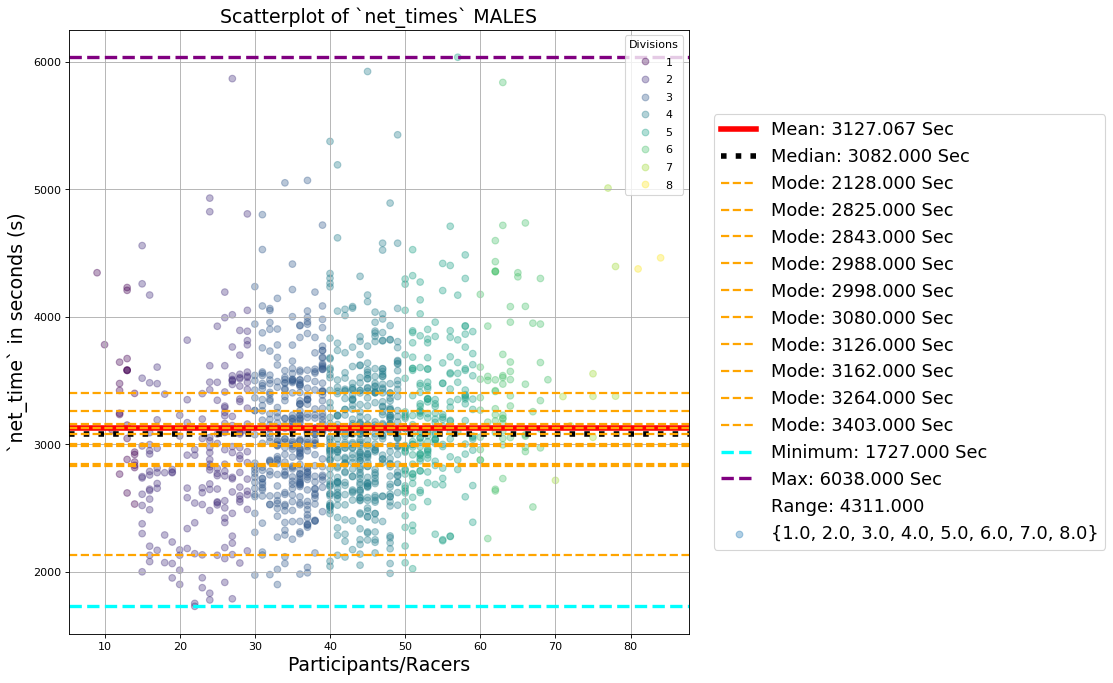

In [29]:
figure(figsize=(10,10), dpi=80)
subset = data.m_df[data.m_df.division_new.notnull()]
subset = subset[subset.division_new>0]
colors = subset['division_new']
scatter = plt.scatter(subset['age'], subset['net_time'],
            c=colors, alpha=0.35, label=set(colors))
mu,mi,med,mx =\
    subset['net_time'].describe().loc[['mean','min','50%','max']]
mod = subset['net_time'].mode()[0]

mod = subset['net_time'].mode()
meanli = plt.axhline(y=mu,color='red', linewidth=5, 
                    linestyle='-', label='Mean: {0:.3f} Sec'.format(mu))
medli = plt.axhline(y=med,color='k', linewidth=5, 
                    linestyle='dotted', label='Median: {0:.3f} Sec'.format(med))

#modeli = plt.axhline(y=mod,color='orange', linewidth=4, 
#                    linestyle='--', label='Mode: {0:.3f} Sec'.format(mod))
modli=[]
for i in range(len(mod)):
    modli.append(plt.axhline(y=mod[i],color='orange', linewidth=2, 
                    linestyle='--', label='Mode: {0:.3f} Sec'.format(mod[i])))

minli = plt.axhline(y=mi,color='aqua', linewidth=3, 
                    linestyle='--', label='Minimum: {0:.3f} Sec'.format(mi))
maxli = plt.axhline(y=mx,color='purple', linewidth=3, 
                    linestyle='--', label='Max: {0:.3f} Sec'.format(mx))
extra = plt.axhline(y=mi,linewidth=0, label='Range: {0:.3f}'.format(mx-mi))

first_legend = plt.legend(*scatter.legend_elements(), title='Divisions',\
                         loc='upper right')
plt.gca().add_artist(first_legend)

plt.legend(handles=[meanli,medli,minli,maxli,extra].append(modli), bbox_to_anchor=(1.04,0.5), 
           loc='center left',borderaxespad=0, prop={'size':16})
plt.grid()
plt.title('Scatterplot of `net_times` MALES', size=17) 
plt.ylabel('`net_time` in seconds (s)', size=17)
plt.xlabel('Participants/Racers', size=17)
plt.show()

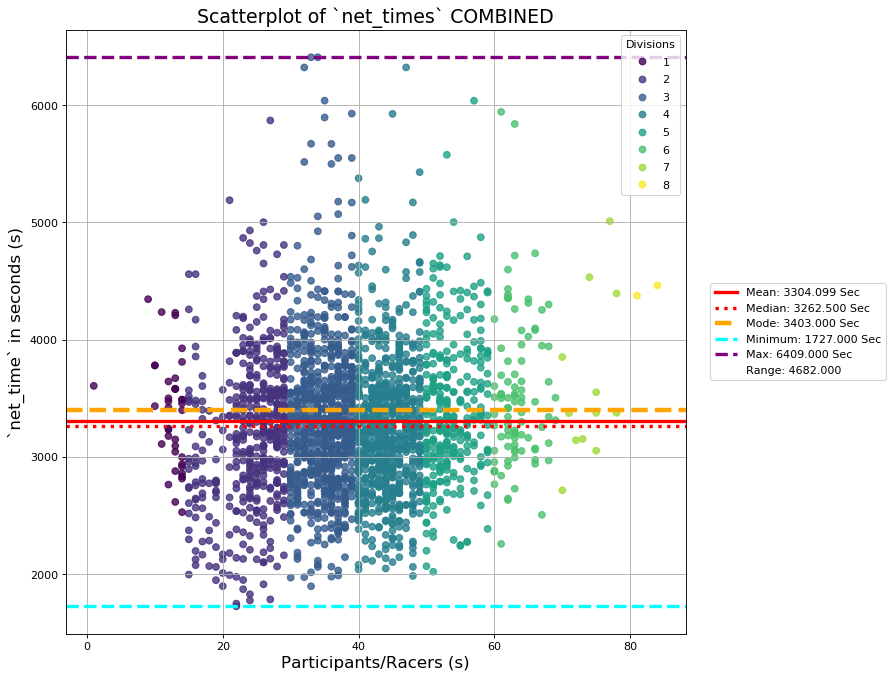

In [30]:
figure(figsize=(10,10), dpi=80)
subset = data.all_df[data.all_df.division_new.notnull()]
subset = subset[subset.division_new>0]
colors = subset['division_new']
scatter = plt.scatter(subset['age'], subset['net_time'],
            c=colors, alpha=.8, label=set(colors))
mu,mi,med,mx =\
    subset['net_time'].describe().loc[['mean','min','50%','max']]
mod = subset['net_time'].mode()[0]


meanli = plt.axhline(y=mu,color='red', linewidth=3, 
                    linestyle='-', label='Mean: {0:.3f} Sec'.format(mu))
minli = plt.axhline(y=mi,color='aqua', linewidth=3, 
                    linestyle='--', label='Minimum: {0:.3f} Sec'.format(mi))
modeli = plt.axhline(y=mod,color='orange', linewidth=4, 
                    linestyle='--', label='Mode: {0:.3f} Sec'.format(mod))
medli = plt.axhline(y=med,color='red', linewidth=3, 
                    linestyle='dotted', label='Median: {0:.3f} Sec'.format(med))
maxli = plt.axhline(y=mx,color='purple', linewidth=3, 
                    linestyle='--', label='Max: {0:.3f} Sec'.format(mx))
extra = plt.axhline(y=mi,linewidth=0, label='Range: {0:.3f}'.format(mx-mi))



first_legend = plt.legend(*scatter.legend_elements(), title='Divisions',\
                         loc='upper right')
plt.gca().add_artist(first_legend)

plt.legend(handles=[meanli,medli,modeli,minli,maxli,extra], bbox_to_anchor=(1.04,0.5), 
           loc='center left',borderaxespad=0)
plt.grid()
plt.title('Scatterplot of `net_times` COMBINED', size=17) 
plt.ylabel('`net_time` in seconds (s)', size=15)
plt.xlabel('Participants/Racers (s)', size=15)
plt.show()

# Q2 Analyze the difference between gun and net time race results.

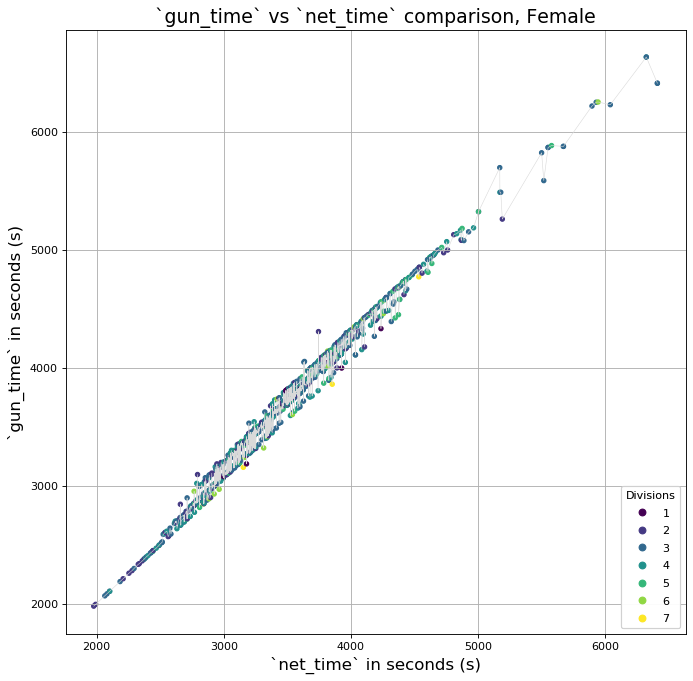

In [31]:
figure(figsize=(10,10), dpi=80)
subset = data.f_df[data.f_df.division_new.notnull()]
subset = subset[subset.division_new>0]
colors = subset['division_new']

scatter=plt.scatter(subset['net_time'], subset['gun_time'],\
           c=colors, alpha=1, s=15, label=set(colors))
plt.plot(subset['net_time'], subset['gun_time'],\
        linewidth=.5, color='0.85')
first_legend = plt.legend(*scatter.legend_elements(), title='Divisions',\
                         loc='lower right')
plt.gca().add_artist(first_legend)

plt.grid()
plt.title('`gun_time` vs `net_time` comparison, Female', size=17)
plt.xlabel('`net_time` in seconds (s)', size=15)
plt.ylabel('`gun_time` in seconds (s)', size=15)
plt.show()


In [32]:
subset[['gun_time','net_time']].corr()

,gun_time,net_time
gun_time,1.000000,0.994272
net_time,0.994272,1.000000


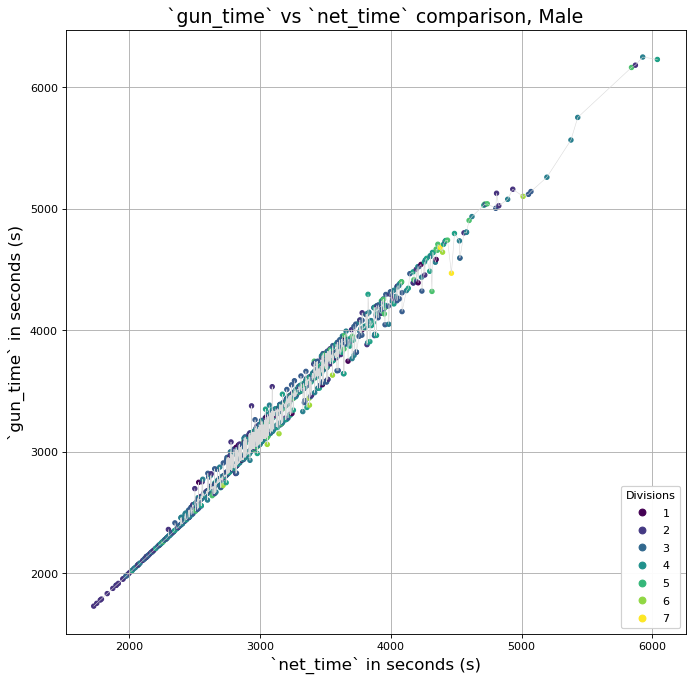

In [33]:
figure(figsize=(10,10), dpi=80)
subset = data.m_df[data.m_df.division_new.notnull()]
subset = subset[subset.division_new>0]
colors = subset['division_new']

plt.scatter(subset['net_time'], subset['gun_time'],\
           c=colors, alpha=1, s=15, label=set(colors))
plt.plot(subset['net_time'], subset['gun_time'],\
        linewidth=.5, color='0.85')
first_legend = plt.legend(*scatter.legend_elements(), title='Divisions',\
                         loc='lower right')
plt.gca().add_artist(first_legend)

plt.grid()
plt.title('`gun_time` vs `net_time` comparison, Male',size=17)
plt.xlabel('`net_time` in seconds (s)',size=15)
plt.ylabel('`gun_time` in seconds (s)',size=15)
plt.show()

In [34]:
subset[['gun_time','net_time']].corr()

,gun_time,net_time
gun_time,1.000000,0.994457
net_time,0.994457,1.000000


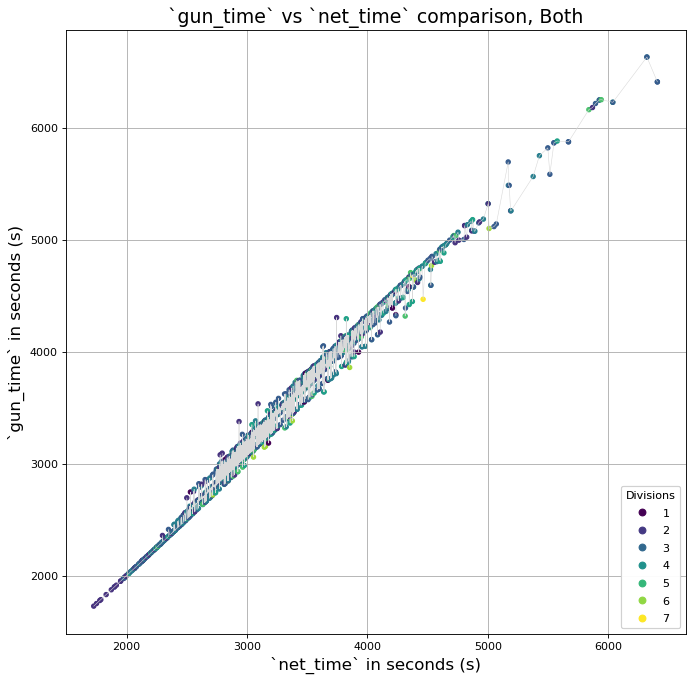

In [35]:
figure(figsize=(10,10), dpi=80)
subset = data.all_df[data.all_df.division_new.notnull()]
subset = subset[subset.division_new>0].sort_values('net_time')
colors = subset['division_new']

plt.scatter(subset['net_time'], subset['gun_time'],\
           c=colors, alpha=1, s=15, label=set(colors))
plt.plot(subset['net_time'], subset['gun_time'],\
        linewidth=.5, color='0.85')
first_legend = plt.legend(*scatter.legend_elements(), title='Divisions',\
                         loc='lower right')
plt.gca().add_artist(first_legend)

plt.grid()
plt.title('`gun_time` vs `net_time` comparison, Both',size=17)
plt.xlabel('`net_time` in seconds (s)', size=15)
plt.ylabel('`gun_time` in seconds (s)',size=15)
plt.show()

In [36]:
subset[['gun_time','net_time']].corr()

,gun_time,net_time
gun_time,1.00000,0.99486
net_time,0.99486,1.00000


In [37]:
subset = data.m_df[data.m_df.division_new.notnull()]
subset = data.all_df[data.all_df.state.notnull()]
subset = subset[subset.division_new>0].sort_values('net_time')
print(set(subset['state']))
color = ['blue','orange','green','red','purple',\
         'pink','gray', 'olive','cyan','lightseagreen','violet'] #,\
          #'darkred', 'cornerflowerblue','navy','darkcyan'] 
color = color[:len(set(subset['state']))]
print(color)

{'washington', 'district of columbia', 'pennsylvania', 'florida', 'new york', 'new jersey', 'north carolina', 'illinois', 'new mexico', 'massachusetts', 'virginia', 'iowa', 'mississippi', 'maryland', 'connecticut'}
['blue', 'orange', 'green', 'red', 'purple', 'pink', 'gray', 'olive', 'cyan', 'lightseagreen', 'violet']


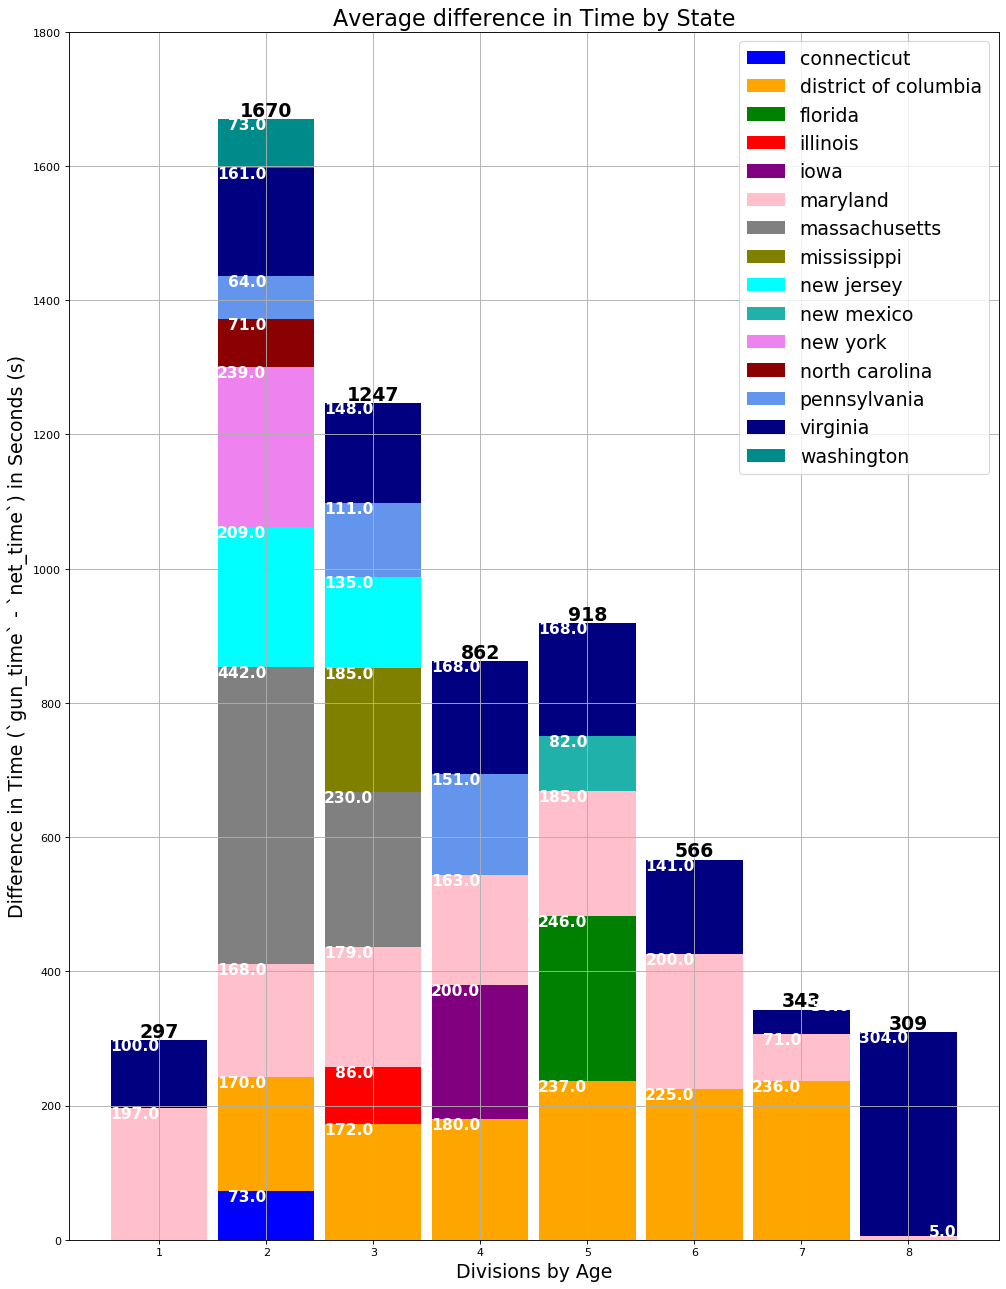

In [38]:
import seaborn as sns
subset = data.all_df[data.all_df.division_new.notnull()]
subset = data.all_df[data.all_df.state.notnull()]
subset = subset[subset.division_new>0].sort_values('net_time')
color = ['blue','orange','green','red','purple',\
         'pink','gray', 'olive','cyan','lightseagreen','violet',\
        'darkred', 'cornflowerblue','navy','darkcyan'] #list(np.random.choice(range(256), size=15))

color = color[:len(set(subset.state))]

agg_stacked =\
    subset.groupby(['division_new','state'])['diff_time'].mean().unstack().fillna(0)

fig, ax = plt.subplots(figsize=(15,20), dpi=80)
bottom = np.zeros(len(agg_stacked))

for i, col in enumerate(agg_stacked.columns):
    ax.bar(agg_stacked.index, agg_stacked[col],bottom=bottom,label=col,\
          width=.9, color=color[i]) 
    bottom+=np.array(agg_stacked[col])

avg_totals = agg_stacked.sum(axis=1)
y_offset=5

for i, total in enumerate(avg_totals):
    ax.text(avg_totals.index[i], total+y_offset, round(total),\
            ha='center', weight='bold', size=17)

y_offset=-15
for i, bar in enumerate(ax.patches):
    if bar.get_height()>0:
        if bar.get_height()<50:
        # Putting the text in the middle of each bar
            ax.text(\
                bar.get_x()+ bar.get_width(),\
                bar.get_height() + bar.get_y(),\
                round(bar.get_height()),
                ha='right', color='w', weight='bold', size=14)
        else:
            ax.text(\
                bar.get_x() +bar.get_width()/2,\
                bar.get_height() + bar.get_y() +y_offset,\
                round(bar.get_height()),
                ha='right', color='w', weight='bold', size=14)
    
plt.grid()
ax.set_ylim([0,1800])
ax.set_title('Average difference in Time by State', size=20)
ax.set_xlabel('Divisions by Age' , size=17)
ax.set_ylabel('Difference in Time (`gun_time` - `net_time`) in Seconds (s)', size=17)
ax.legend(prop={'size':17})

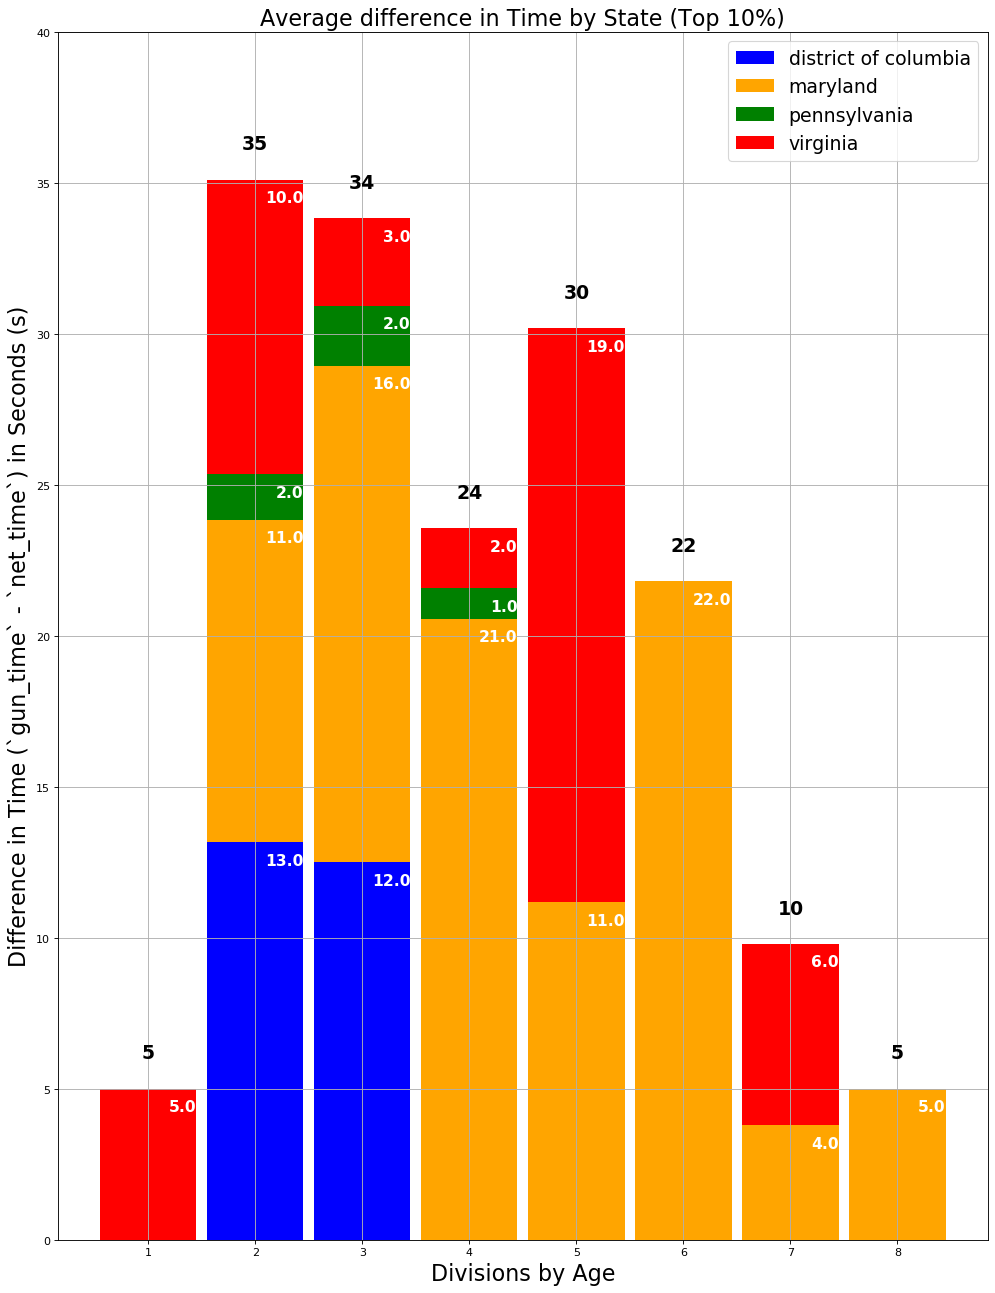

In [39]:
import seaborn as sns
subset = data.all_df[data.all_df.division_new.notnull()]
subset = data.all_df[data.all_df.state.notnull()]
subset = subset[subset.division_new>0].sort_values('net_time')
q10= np.quantile(subset.diff_time, .1)
subset = subset[subset.diff_time<q10]
color = ['blue','orange','green','red','purple',\
         'pink','gray', 'olive','cyan','lightseagreen','violet',\
        'darkred', 'cornflowerblue','navy','darkcyan'] #list(np.random.choice(range(256), size=15))

color = color[:len(set(subset.state))]

agg_stacked =\
    subset.groupby(['division_new','state'])['diff_time'].mean().unstack().fillna(0)

fig, ax = plt.subplots(figsize=(15,20), dpi=80)
bottom = np.zeros(len(agg_stacked))

for i, col in enumerate(agg_stacked.columns):
    ax.bar(agg_stacked.index, agg_stacked[col],bottom=bottom,label=col,\
          width=.9, color=color[i]) 
    bottom+=np.array(agg_stacked[col])

avg_totals = agg_stacked.sum(axis=1)
y_offset=1

for i, total in enumerate(avg_totals):
    ax.text(avg_totals.index[i], total+y_offset, round(total),\
            ha='center', weight='bold', size=17)

y_offset=-15
for i, bar in enumerate(ax.patches):
    if bar.get_height()>0:
        if bar.get_height()<50:
        # Putting the text in the middle of each bar
            ax.text(\
                bar.get_x()+ bar.get_width(),\
                bar.get_height() + bar.get_y() -.75,\
                round(bar.get_height()),
                ha='right', color='w', weight='bold', size=14)
        else:
            ax.text(\
                bar.get_x() +bar.get_width()/2,\
                bar.get_height() + bar.get_y() -5,\
                round(bar.get_height()),
                ha='right', color='w', weight='bold', size=14)
    
plt.grid()
ax.set_ylim([0,40])
ax.set_title('Average difference in Time by State (Top 10%)', size=20)
ax.set_xlabel('Divisions by Age' , size=20)
ax.set_ylabel('Difference in Time (`gun_time` - `net_time`) in Seconds (s)', size=20)
ax.legend(prop={'size':17})

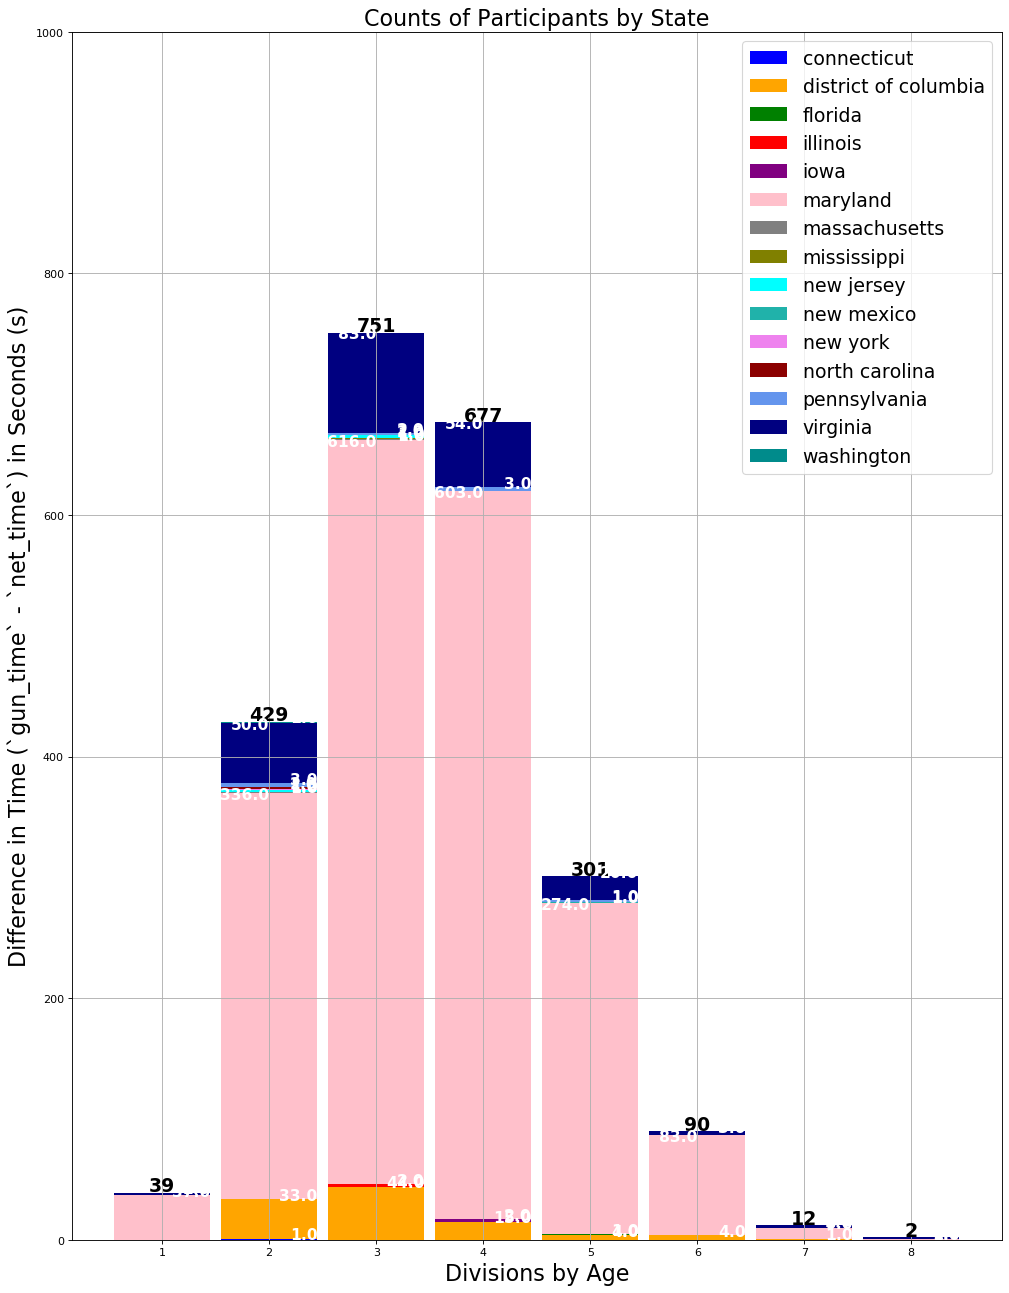

In [40]:
import seaborn as sns
subset = data.all_df[data.all_df.division_new.notnull()]
subset = data.all_df[data.all_df.state.notnull()]
subset = subset[subset.division_new>0].sort_values('net_time')
#q10= np.quantile(subset.diff_time, .1)
#subset = subset[subset.diff_time<q10]

color = ['blue','orange','green','red','purple',\
         'pink','gray', 'olive','cyan','lightseagreen','violet',\
        'darkred', 'cornflowerblue','navy','darkcyan'] #list(np.random.choice(range(256), size=15))

color = color[:len(set(subset.state))]

agg_stacked =\
    subset.groupby(['division_new','state'])['diff_time'].count().unstack().fillna(0)

fig, ax = plt.subplots(figsize=(15,20), dpi=80)
bottom = np.zeros(len(agg_stacked))

for i, col in enumerate(agg_stacked.columns):
    ax.bar(agg_stacked.index, agg_stacked[col],bottom=bottom,label=col,\
          width=.9, color=color[i]) 
    bottom+=np.array(agg_stacked[col])

avg_totals = agg_stacked.sum(axis=1)
y_offset=1

for i, total in enumerate(avg_totals):
    ax.text(avg_totals.index[i], total+y_offset, round(total),\
            ha='center', weight='bold', size=17)

y_offset=-15
for i, bar in enumerate(ax.patches):
    if bar.get_height()>0:
        if bar.get_height()<50:
        # Putting the text in the middle of each bar
            ax.text(\
                bar.get_x()+ bar.get_width(),\
                bar.get_height() + bar.get_y() -.75,\
                round(bar.get_height()),
                ha='right', color='w', weight='bold', size=14)
        else:
            ax.text(\
                bar.get_x() +bar.get_width()/2,\
                bar.get_height() + bar.get_y() -5,\
                round(bar.get_height()),
                ha='right', color='w', weight='bold', size=14)
    
plt.grid()
ax.set_ylim([0,1000])
ax.set_title('Counts of Participants by State', size=20)
ax.set_xlabel('Divisions by Age' , size=20)
ax.set_ylabel('Difference in Time (`gun_time` - `net_time`) in Seconds (s)', size=20)
ax.legend(prop={'size':17})

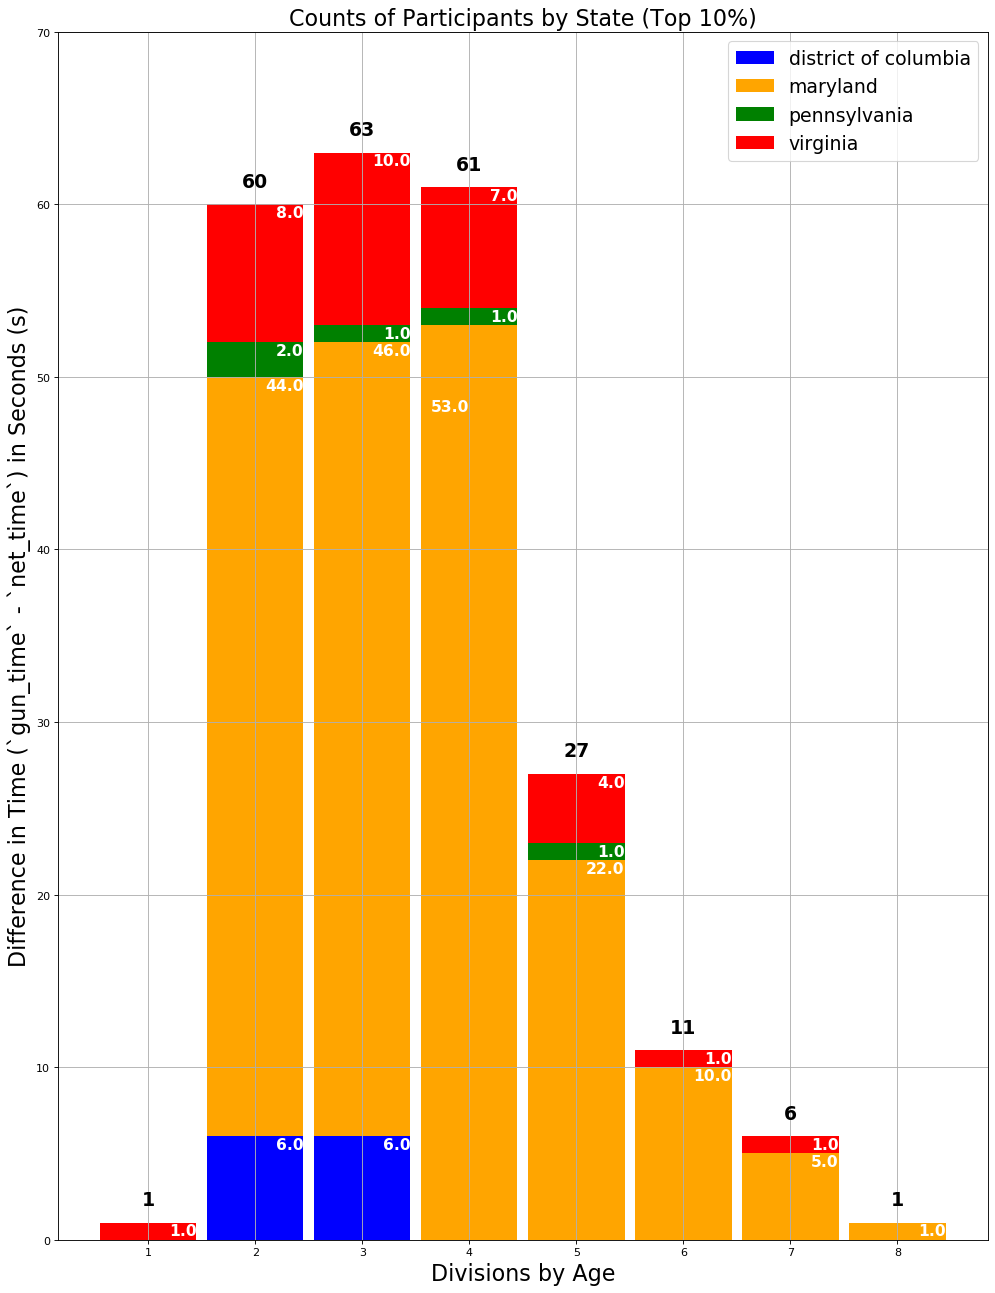

In [41]:
import seaborn as sns
subset = data.all_df[data.all_df.division_new.notnull()]
subset = data.all_df[data.all_df.state.notnull()]
subset = subset[subset.division_new>0].sort_values('net_time')
q10= np.quantile(subset.diff_time, .1)
subset = subset[subset.diff_time<q10]

color = ['blue','orange','green','red','purple',\
         'pink','gray', 'olive','cyan','lightseagreen','violet',\
        'darkred', 'cornflowerblue','navy','darkcyan'] #list(np.random.choice(range(256), size=15))

color = color[:len(set(subset.state))]

agg_stacked =\
    subset.groupby(['division_new','state'])['diff_time'].count().unstack().fillna(0)

fig, ax = plt.subplots(figsize=(15,20), dpi=80)
bottom = np.zeros(len(agg_stacked))

for i, col in enumerate(agg_stacked.columns):
    ax.bar(agg_stacked.index, agg_stacked[col],bottom=bottom,label=col,\
          width=.9, color=color[i]) 
    bottom+=np.array(agg_stacked[col])

avg_totals = agg_stacked.sum(axis=1)
y_offset=1

for i, total in enumerate(avg_totals):
    ax.text(avg_totals.index[i], total+y_offset, round(total),\
            ha='center', weight='bold', size=17)

y_offset=-15
for i, bar in enumerate(ax.patches):
    if bar.get_height()>0:
        if bar.get_height()<50:
        # Putting the text in the middle of each bar
            ax.text(\
                bar.get_x()+ bar.get_width(),\
                bar.get_height() + bar.get_y() -.75,\
                round(bar.get_height()),
                ha='right', color='w', weight='bold', size=14)
        else:
            ax.text(\
                bar.get_x() +bar.get_width()/2,\
                bar.get_height() + bar.get_y() -5,\
                round(bar.get_height()),
                ha='right', color='w', weight='bold', size=14)
    
plt.grid()
ax.set_ylim([0,70])
ax.set_title('Counts of Participants by State (Top 10%)', size=20)
ax.set_xlabel('Divisions by Age' , size=20)
ax.set_ylabel('Difference in Time (`gun_time` - `net_time`) in Seconds (s)', size=20)
ax.legend(prop={'size':17})

# Q3 How much time separates Chris Doe from the top 10 percentile of racers of the same division

2983
2983.0


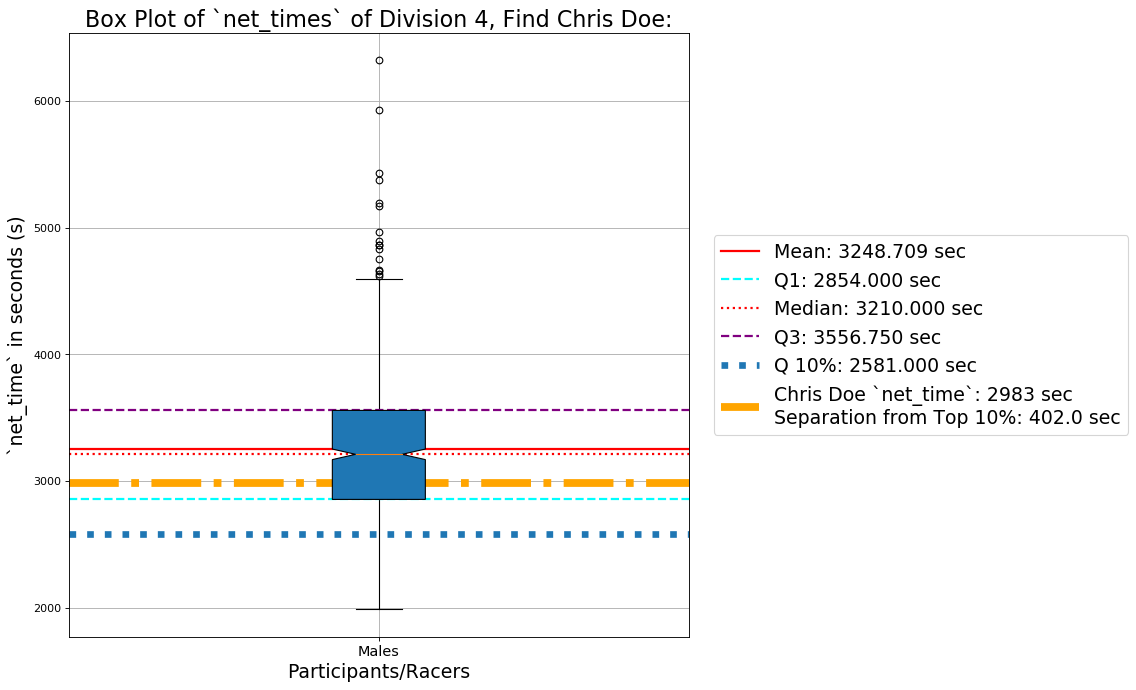

In [42]:
figure(figsize=(10,10), dpi=80)

chrisdoe = data.all_df.loc[data.all_df.name=='chris doe',:]
cd_nt = int(chrisdoe.net_time)
print(cd_nt)
net_array =\
    np.array(data.all_df
             .loc[data.all_df.division_new==float(chrisdoe.division_new),\
                  'net_time'\
                 ]\
            )

colors = ['blue']

bp = plt.boxplot(net_array,
              patch_artist=True,
              notch=True)

q1, q50,q3,q10= np.quantile(net_array, [.25,.50,.75,.1])
mu = net_array.mean()


print(float(chrisdoe.net_time))

meanli = plt.axhline(y=mu,color='red', linewidth=2, 
                    linestyle='-', label='Mean: {0:.3f} sec'.format(mu))
q1li = plt.axhline(y=q1,color='aqua', linewidth=2, 
                    linestyle='--', label='Q1: {0:.3f} sec'.format(q1))
medli = plt.axhline(y=q50,color='red', linewidth=2, 
                    linestyle='dotted', label='Median: {0:.3f} sec'.format(q50))
q3li = plt.axhline(y=q3,color='purple', linewidth=2, 
                    linestyle='--', label='Q3: {0:.3f} sec'.format(q3))
q10li = plt.axhline(y=q10,linewidth=6,\
                    linestyle=':',label='Q 10%: {0:.3f} sec'.format(q10))

cdli = plt.axhline(y=cd_nt, color='orange', linewidth=7,linestyle='-.',\
                  label='Chris Doe `net_time`: {} sec\nSeparation from Top 10%: {} sec'\
                   .format(int(chrisdoe.net_time), int(chrisdoe.net_time)-q10))

#first_legend = plt.legend(*scatter.legend_elements(), title='Divisions',\
                         #loc='upper right')
#plt.gca().add_artist(first_legend)

plt.legend(handles=[meanli,q1li,medli,q3li, q10li, cdli], bbox_to_anchor=(1.04,0.5),\
           loc='center left', borderaxespad=0, prop={'size':17})
    
plt.xticks([1],['Males'], size=13)
plt.title('Box Plot of `net_times` of Division {}, Find Chris Doe:'\
          .format(int(chrisdoe.division_new)), size=20)  
plt.ylabel('`net_time` in seconds (s)', size=17)
plt.xlabel('Participants/Racers', size=17)
plt.grid()
plt.show()

2983
2983.0


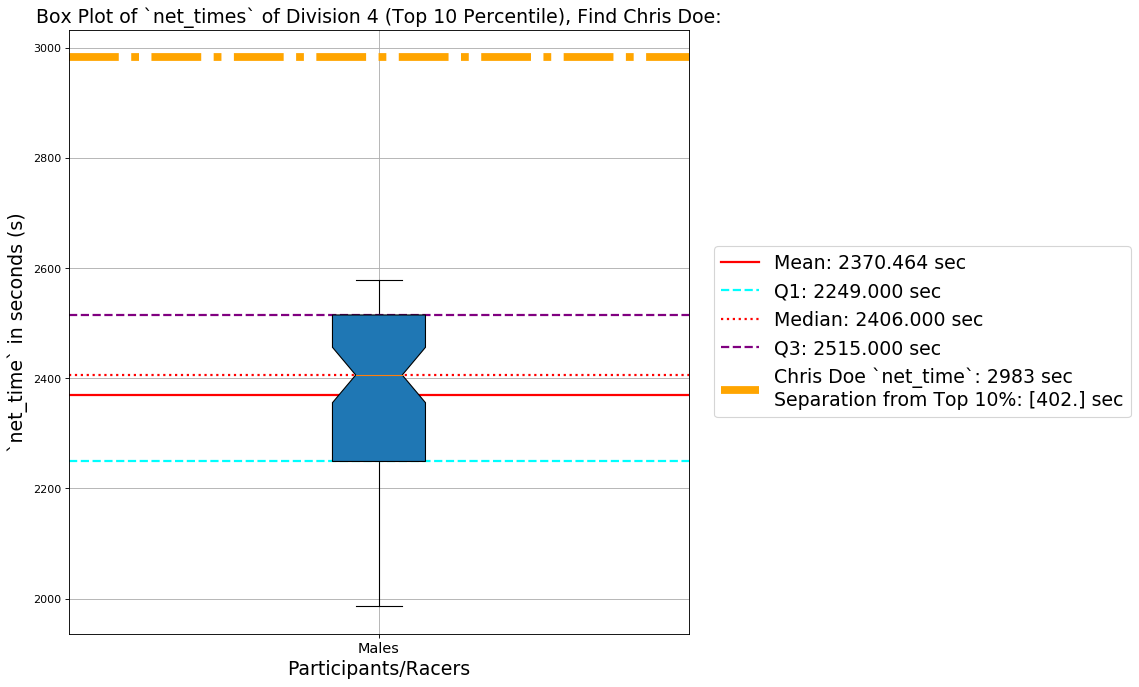

In [43]:
figure(figsize=(10,10), dpi=80)

chrisdoe = data.all_df.loc[data.all_df.name=='chris doe',:]
cd_nt = int(chrisdoe.net_time)
print(cd_nt)
net_array =\
    np.array(data.all_df
             .loc[data.all_df.division_new==float(chrisdoe.division_new),\
                  'net_time'\
                 ]\
            )

colors = ['blue']



q10= np.quantile(net_array, [.1])
net_array = net_array[net_array<q10]

q1,q50,q3 = np.quantile(net_array, [.25,.50,.75])
mu = net_array.mean()

bp = plt.boxplot(net_array,
              patch_artist=True,
              notch=True)

print(float(chrisdoe.net_time))

meanli = plt.axhline(y=mu,color='red', linewidth=2, 
                    linestyle='-', label='Mean: {0:.3f} sec'.format(mu))
q1li = plt.axhline(y=q1,color='aqua', linewidth=2, 
                    linestyle='--', label='Q1: {0:.3f} sec'.format(q1))
medli = plt.axhline(y=q50,color='red', linewidth=2, 
                    linestyle='dotted', label='Median: {0:.3f} sec'.format(q50))
q3li = plt.axhline(y=q3,color='purple', linewidth=2, 
                    linestyle='--', label='Q3: {0:.3f} sec'.format(q3))
#q10li = plt.axhline(y=q10,linewidth=6,\
                    #linestyle=':',label='Q 10%: {0:.3f} sec'.format(q10))

cdli = plt.axhline(y=cd_nt, color='orange', linewidth=7,linestyle='-.',\
                  label='Chris Doe `net_time`: {} sec\nSeparation from Top 10%: {} sec'\
                   .format(int(chrisdoe.net_time), int(chrisdoe.net_time)-q10))

#first_legend = plt.legend(*scatter.legend_elements(), title='Divisions',\
                         #loc='upper right')
#plt.gca().add_artist(first_legend)

plt.legend(handles=[meanli,q1li,medli,q3li, cdli], bbox_to_anchor=(1.04,0.5),\
           loc='center left', borderaxespad=0, prop={'size':17})
    
plt.xticks([1],['Males'], size=13)
plt.title('Box Plot of `net_times` of Division {} (Top 10 Percentile), Find Chris Doe:'\
          .format(int(chrisdoe.division_new)), size=17)  
plt.ylabel('`net_time` in seconds (s)', size=17)
plt.xlabel('Participants/Racers', size=17)
plt.grid()
plt.show()

# Q4 Compare the race results of each division.

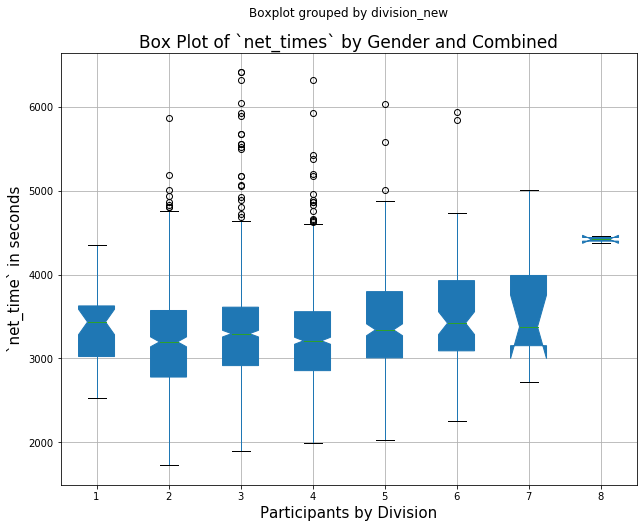

In [44]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
subset = data.all_df[data.all_df.division_new.notnull()]
subset = subset[subset.division_new>0]#.sort_values('net_time')

div = [i for i in range(1,9)]
colors = list(np.random.choice(range(256), size=8)) #div #['red','blue','green']

bp = subset.boxplot(column='net_time', by='division_new',
                  notch=True, patch_artist=True, ax=ax ) #,
                   #boxprops=dict(facecolor=colors, color=colors))

plt.xticks(div, div)
plt.title('Box Plot of `net_times` by Gender and Combined', size=17)  
plt.ylabel('`net_time` in seconds', size=15)
plt.xlabel('Participants by Division',size=15)

plt.show()

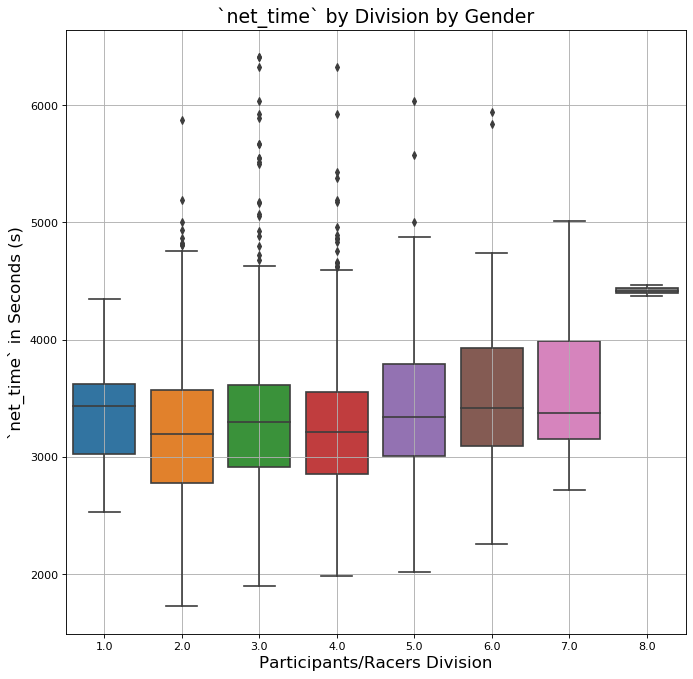

In [45]:
figure(figsize=(10,10), dpi=80)
subset.head()
ax=sns.boxplot(x='division_new', y='net_time',data=subset)
plt.grid()
plt.title("`net_time` by Division by Gender",size=17)
plt.xlabel("Participants/Racers Division", size=15)
plt.ylabel("`net_time` in Seconds (s)", size=15)
plt.show()
plt.clf()
plt.close()

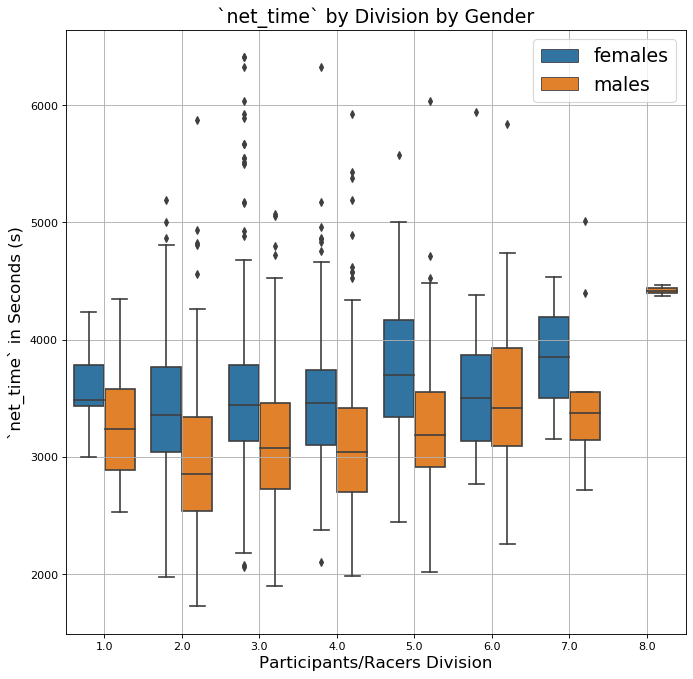

In [46]:
figure(figsize=(10,10), dpi=80)
subset.head()
ax=sns.boxplot(x='division_new', y='net_time', hue='gender',data=subset)
plt.grid()
plt.title("`net_time` by Division by Gender",size=17)
plt.xlabel("Participants/Racers Division", size=15)
plt.ylabel("`net_time` in Seconds (s)", size=15)
plt.legend(prop={'size':17})
plt.show()
